# Predicting Census Tract Evition Rates
#### Analysis and Modeling: Jack Mannix
##### 9/8/2021

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
sns.set(style='darkgrid')

In [3]:
tracts_df = pd.read_csv('./data/dataframes/final_tracts.csv')

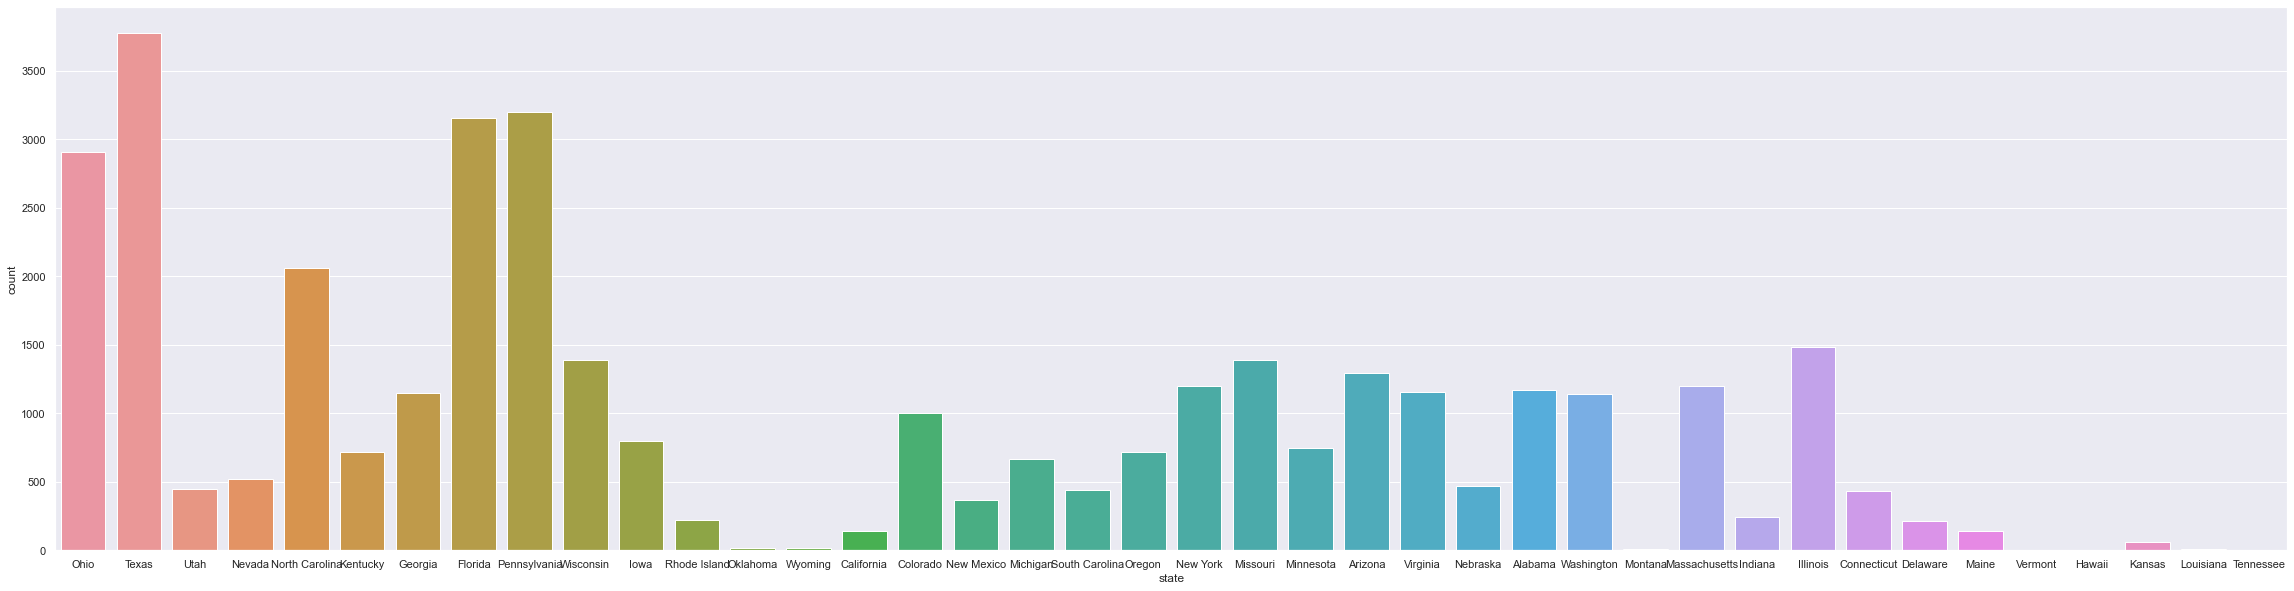

In [4]:
fig, ax = plt.subplots(figsize=(40, 10))
ax=sns.countplot('state', data=tracts_df)

In [5]:
tracts_df.state.value_counts()

Texas             3779
Pennsylvania      3197
Florida           3156
Ohio              2907
North Carolina    2061
Illinois          1482
Wisconsin         1392
Missouri          1390
Arizona           1295
Massachusetts     1196
New York          1196
Alabama           1173
Virginia          1156
Georgia           1150
Washington        1138
Colorado           999
Iowa               801
Minnesota          748
Oregon             715
Kentucky           715
Michigan           669
Nevada             517
Nebraska           469
Utah               448
South Carolina     438
Connecticut        433
New Mexico         367
Indiana            244
Rhode Island       224
Delaware           214
California         140
Maine              139
Kansas              61
Wyoming             17
Oklahoma            14
Louisiana           12
Montana              6
Vermont              5
Tennessee            4
Hawaii               1
Name: state, dtype: int64

**CLEANING**
- States with a low amount of entries may cause issues with modeling
- I will drop those belonging to states with < 400 entries (14)

In [6]:
drop_states = list(tracts_df.state.value_counts().keys()[-14:])

for index, row in tracts_df.iterrows():
    if row.state in drop_states:
        tracts_df.drop(index, inplace=True)

## Feature Engineering - Census Regions & Divisions

**OBSERVATION**
- Creating a dummy variable for every census tract (<30,000), or every state (26) is very inefficient
- I will group the states into the 8 regions designated by the Census
    1. Pacific
    2. Mountain
    3. West North Central
    4. West South Central
    5. East North Central
    6. East South Central  
    7. North East
    8. Mid Atlantic


In [7]:
region_dict = {'pcf' : ['Oregon', 'Washington'],
'mt' : ['Nevada', 'Utah', 'Arizona', 'Colorado'],
'wnc' : ['Nebraska', 'Minnesota', 'Iowa', 'Missouri'],
'wsc' : ['Texas'],
'enc' : ['Wisconsin', 'Illinois', 'Michigan', 'Ohio'],
'ma' : ['Pennsylvania', 'New York'],
'ne' : ['Massachusetts', 'Connecticut'],
'sa' : ['Virginia', 'Georgia', 'South Carolina', 'Florida', 'North Carolina'],
'esc' : ['Alabama', 'Kentucky']}

state_list = list(tracts_df['state'])
region_list = []

for state in state_list:
    for key, value in region_dict.items():
        if state in value:
            region_list.append(key)
            
tracts_df['region'] = region_list

<AxesSubplot:xlabel='region', ylabel='count'>

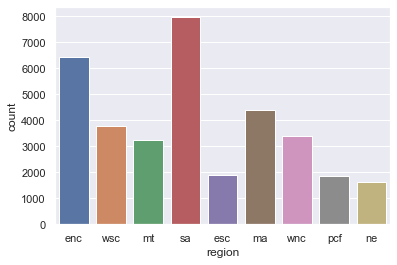

In [8]:
sns.countplot('region', data=tracts_df)

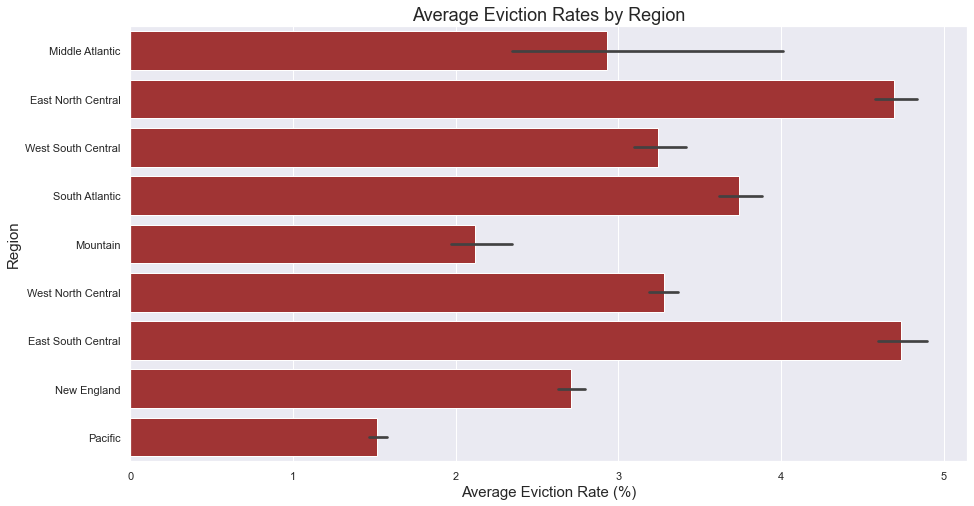

In [9]:
data = {'region': tracts_df['region'].values, 'eviction_rate': tracts_df['eviction.rate']}
region_df = pd.DataFrame(data)
region_df.sort_values(by='eviction_rate', ascending=False,inplace=True)

fig, ax = plt.subplots(figsize=(15,8))

ax = sns.barplot(region_df['eviction_rate'], region_df['region'], 
                     data=region_df, color='firebrick')
ax.set_yticklabels(['Middle Atlantic', 'East North Central', 'West South Central', 'South Atlantic', 
                    'Mountain', 'West North Central', 'East South Central', 'New England', 'Pacific'])
ax.set_ylabel('Region', fontsize=15)
ax.set_xlabel('Average Eviction Rate (%)', fontsize=15)
ax.set_title('Average Eviction Rates by Region', fontsize=18)

plt.savefig('images/region_rates.png');


## National EDA

In [10]:
tracts_df[tracts_df['eviction.rate'] > 90 ]

,Unnamed: 0,name,state,GEOID,population,poverty.rate,renter.occupied.households,pct.renter.occupied,median.gross.rent,median.household.income,...,pct.nh.pi,pct.multiple,pct.other,eviction.filings,evictions,eviction.rate,eviction.filing.rate,male,female,region
8206,8206,163.0_Bronx County,New York,3.600502e+10,264.750000,25.000000,1.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,15.000000,2.000000,200.000000,1500.000000,39.50,60.50,ma
9124,9124,18.0_Kings County,New York,3.604700e+10,2187.333333,4.166667,5.000000,28.570000,316.666667,28333.333333,...,0.000,1.880000,0.070000,43.000000,8.666667,174.273333,859.273333,95.70,4.30,ma
13882,13882,24.0_Bronx County,New York,3.600500e+10,37.500000,0.000000,1.000000,25.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,33.250000,1.500000,166.667500,4308.332500,72.95,27.05,ma
14853,14853,27.06_Nueces County,Texas,4.835500e+10,711.317500,4.597500,1.000000,32.387500,615.000000,55158.250000,...,0.015,0.882500,0.067500,2.000000,1.500000,150.000000,200.000000,41.80,58.20,wsc
18463,18463,36.05_Mobile County,Alabama,1.097004e+09,1371.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000,2.525000,0.330000,13.625000,8.875000,938.541250,1475.000000,39.70,60.30,esc
23128,23128,5007.0_Hartford County,Connecticut,9.003501e+09,1435.727273,0.000000,0.818182,36.363636,0.000000,0.000000,...,0.000,2.465455,0.535455,1.545455,1.454545,145.454545,154.545455,98.70,1.30,ne
25153,25153,58.0_Jackson County,Michigan,2.607501e+10,5060.888889,6.755556,0.333333,7.873333,64.260000,2361.660000,...,0.000,4.156667,0.044444,0.888889,0.333333,95.805556,151.361111,99.90,0.10,enc
36016,36016,9805.0_Hillsborough County,Florida,1.205798e+10,39.100000,3.377143,5.428571,29.057143,935.000000,49638.333333,...,0.010,1.398571,0.035714,18.000000,6.000000,378.405714,1137.201429,0.00,100.00,sa


In [11]:
tracts_df.drop(tracts_df[tracts_df['eviction.rate'] > 90].index, inplace=True)

**CLEANING**
- Eviction rates >= 90 are misleading, as these high rates are due to the fact that an eviction has occured in a census tract with a very low amount of renters (<5)
- I am dropping these values for the sake of extreme outlier removal

<AxesSubplot:xlabel='poverty.rate', ylabel='eviction.rate'>

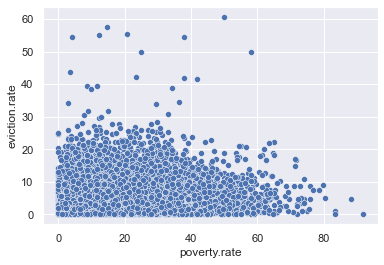

In [12]:
sns.scatterplot('poverty.rate', 'eviction.rate', data=tracts_df)

<AxesSubplot:xlabel='poverty.rate', ylabel='Density'>

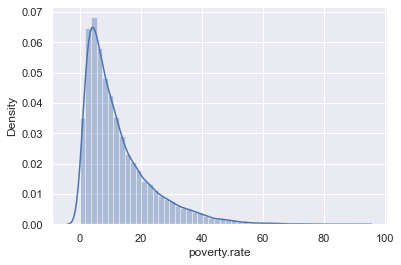

In [13]:
sns.distplot(tracts_df['poverty.rate'])

**OBSERVATION**
- eviction rate seems to decerease as poverty rate increases, which seems counterintuitive 
- this could be due to the fact that ~80% of the data has a poverty rate below 20%

<AxesSubplot:xlabel='poverty.rate', ylabel='eviction.filing.rate'>

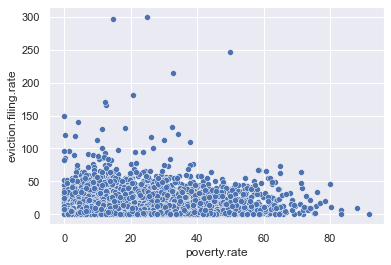

In [14]:
sns.scatterplot('poverty.rate', 'eviction.filing.rate', data=tracts_df)

<AxesSubplot:xlabel='pct.af.am', ylabel='eviction.rate'>

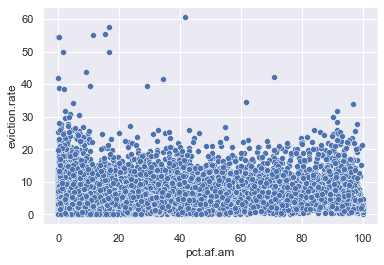

In [15]:
sns.scatterplot('pct.af.am', 'eviction.rate', data=tracts_df)

<AxesSubplot:xlabel='pct.af.am', ylabel='rent.burden'>

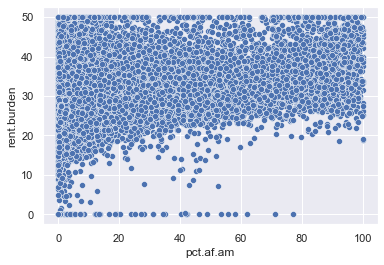

In [16]:
sns.scatterplot('pct.af.am', 'rent.burden', data=tracts_df)

<AxesSubplot:xlabel='pct.white', ylabel='eviction.rate'>

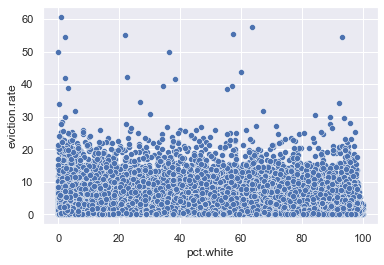

In [17]:
sns.scatterplot('pct.white', 'eviction.rate', data=tracts_df)

<AxesSubplot:xlabel='pct.white', ylabel='rent.burden'>

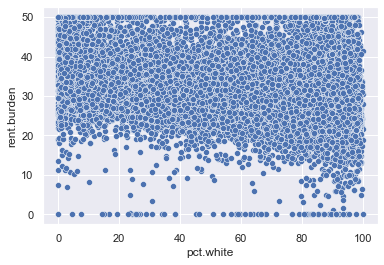

In [18]:
sns.scatterplot('pct.white', 'rent.burden', data=tracts_df)

<AxesSubplot:xlabel='rent.burden', ylabel='eviction.rate'>

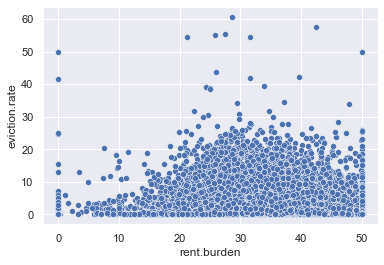

In [19]:
sns.scatterplot('rent.burden', 'eviction.rate', data=tracts_df)

<AxesSubplot:xlabel='eviction.rate', ylabel='eviction.filing.rate'>

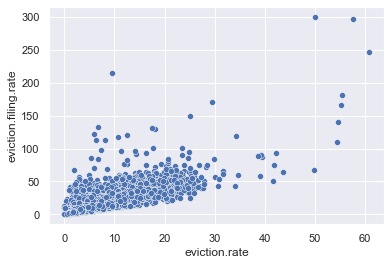

In [20]:
sns.scatterplot('eviction.rate', 'eviction.filing.rate', data=tracts_df)

**OBSERVATION**
- The relationship between eviction filing rate and eviction rate seems to have the strongest correlation
    - This is to be expected as there needs to be an eviction filing before an actual eviction takes place 

<AxesSubplot:xlabel='median.property.value', ylabel='eviction.rate'>

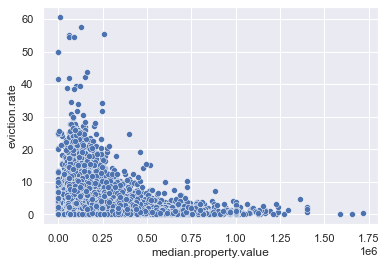

In [21]:
sns.scatterplot('median.property.value', 'eviction.rate', data=tracts_df)

**OBSERVATION**
- Lower property values tend to have higher eviction rates 

<AxesSubplot:xlabel='median.household.income', ylabel='eviction.rate'>

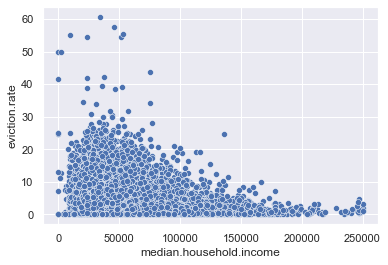

In [22]:
sns.scatterplot('median.household.income', 'eviction.rate', data=tracts_df)

**OBSERVATION**
- Lower household incomes tend to have higher eviction rates 

## Feature Engineering - Evictions/Filings Ratio

- This ratio reflects the percentage of the eviction filings that actually resulted in evictions 

In [23]:
tracts_df['ef.ratio'] = (tracts_df['evictions'] / tracts_df['eviction.filings'])*100

In [24]:
tracts_df.fillna(0, inplace=True)

In [25]:
tracts_df['ef.ratio']

0        43.396226
1        38.095238
2        75.000000
3        60.169492
4        21.907514
           ...    
36063    40.425532
36064    48.484848
36065    42.268041
36066    36.842105
36067    41.176471
Name: ef.ratio, Length: 34612, dtype: float64

<AxesSubplot:xlabel='ef.ratio', ylabel='eviction.rate'>

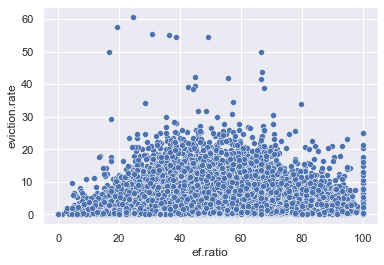

In [26]:
sns.scatterplot('ef.ratio', 'eviction.rate', data=tracts_df)

**OBSERVATION**
- As the % of evictions by filings increases, so does eviction rate
- % of evictions by filings seems to platue when eviction rate is ~20% (with occasional outliers) 
- ratios of 100% appear to be occuring with low evictions ( 3% of the 100% ratios are of 10 evicitons and up) 

# Majority Ethncity T-test

Exploring if the eviction rate of a census tract with a majority (>50.4) of a particular race has a significant different between census tracts in which said race is a minority (<=50.4)

In [29]:
from scipy.stats import ttest_ind

In [30]:
#creating two dataframes to be used as samples in ttest 
maj_white = tracts_df[tracts_df['pct.white'] > 50.4]
min_white = tracts_df[tracts_df['pct.white'] <= 50.4]

white_ttest = ttest_ind(maj_white['eviction.rate'], min_white['eviction.rate'])

print(white_ttest[1])

#finding mean of each sample
print('Majority White Eviction Rate:', maj_white['eviction.rate'].mean())
print('Minority White Eviction Rate:', min_white['eviction.rate'].mean())

0.0
Majority White Eviction Rate: 2.8581415848242058
Minority White Eviction Rate: 5.324363137678499


<AxesSubplot:xlabel='pct.white', ylabel='eviction.rate'>

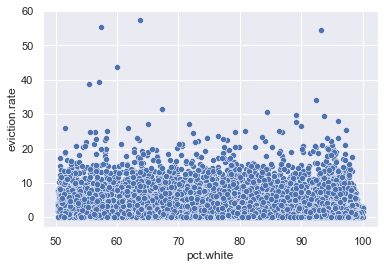

In [31]:
sns.scatterplot('pct.white', 'eviction.rate', data=maj_white)

<AxesSubplot:xlabel='pct.white', ylabel='eviction.rate'>

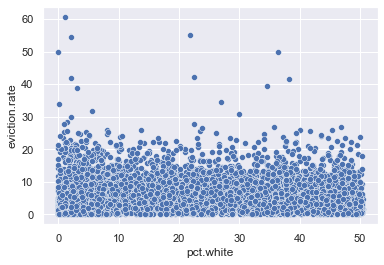

In [32]:
sns.scatterplot('pct.white', 'eviction.rate', data=min_white)

**OBSERVATION**
- The eviction rate for majority white census tracts is ~2% lower than census tracts in which white is the minority race
- p-value of 0.0 indicates a significant difference between the two populations

In [33]:
maj_afam = tracts_df[tracts_df['pct.af.am'] > 50.4]
min_afam = tracts_df[tracts_df['pct.af.am'] <= 50.4]

afam_ttest = ttest_ind(maj_afam['eviction.rate'], min_afam['eviction.rate'])

print(afam_ttest)
print('Majority Eviction Rate:', maj_afam['eviction.rate'].mean())
print('Minority Eviction Rate:', min_afam['eviction.rate'].mean())



Ttest_indResult(statistic=54.20309986775818, pvalue=0.0)
Majority Eviction Rate: 6.659137832274865
Minority Eviction Rate: 3.1889408139010174


<AxesSubplot:xlabel='pct.af.am', ylabel='eviction.rate'>

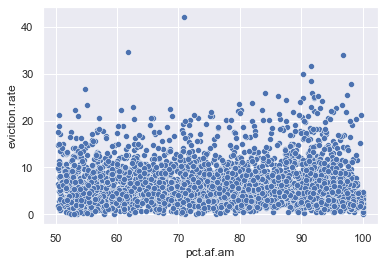

In [34]:
sns.scatterplot('pct.af.am', 'eviction.rate', data=maj_afam)

<AxesSubplot:xlabel='pct.af.am', ylabel='eviction.rate'>

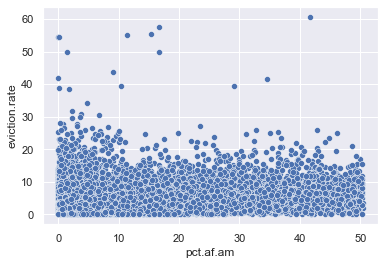

In [35]:
sns.scatterplot('pct.af.am', 'eviction.rate', data=min_afam)

**OBSERVATION**
- The eviction rate for majority aferican american census tracts is >3% higher than census tracts in which aferican american is the minority race
- p-value of 0.0 indicates a significant difference between the majority and minority populations

In [36]:
maj_hispanic = tracts_df[tracts_df['pct.hispanic'] > 50.4]
min_hispanic = tracts_df[tracts_df['pct.hispanic'] <= 50.4]

hispanic_ttest = ttest_ind(maj_hispanic['eviction.rate'], min_hispanic['eviction.rate'])

print(hispanic_ttest[1])
print('Majority Eviction Rate:', maj_hispanic['eviction.rate'].mean())
print('Minority Eviction Rate:', min_hispanic['eviction.rate'].mean())


1.0681346622092608e-12
Majority Eviction Rate: 3.9846269696460745
Minority Eviction Rate: 3.4623368352373634


<AxesSubplot:xlabel='pct.hispanic', ylabel='eviction.rate'>

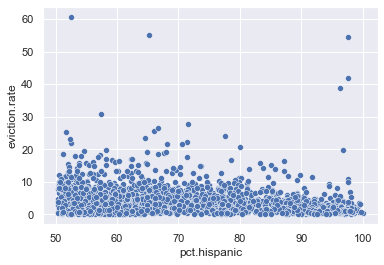

In [37]:
sns.scatterplot('pct.hispanic', 'eviction.rate', data=maj_hispanic)

<AxesSubplot:xlabel='pct.hispanic', ylabel='eviction.rate'>

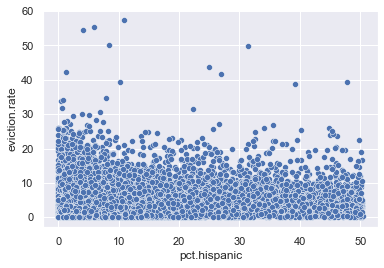

In [38]:
sns.scatterplot('pct.hispanic', 'eviction.rate', data=min_hispanic)

**OBSERVATION**
- The eviction rate for majority hispanic census tracts is ~0.6% higher than census tracts in which hispanic is the minority race
- miniscule p-value indicates a significant difference between the two populations

In [39]:
maj_amind = tracts_df[tracts_df['pct.am.ind'] > 50.4]
min_amind = tracts_df[tracts_df['pct.am.ind'] <= 50.4]

amind_ttest = ttest_ind(maj_amind['eviction.rate'], min_amind['eviction.rate'])

print(amind_ttest[1])
print('Majority Eviction Rate:', maj_amind['eviction.rate'].mean())
print('Minority Eviction Rate:', min_amind['eviction.rate'].mean())


2.6002969388137e-09
Majority Eviction Rate: 0.8431973951973951
Minority Eviction Rate: 3.5051934919654326


**OBSERVATION**
- Eviction rate increases when native american population is the minority race 

In [40]:
print(maj_amind.shape[0])
print(min_amind.shape[0])

63
34549


In [41]:
maj_asian = tracts_df[tracts_df['pct.asian'] > 50.4]
min_asian = tracts_df[tracts_df['pct.asian'] <= 50.4]

asian_ttest = ttest_ind(maj_asian['eviction.rate'], min_asian['eviction.rate'])

print(asian_ttest[1])
print('Majority Eviction Rate:', maj_asian['eviction.rate'].mean())
print('Minority Eviction Rate:', min_asian['eviction.rate'].mean())


0.0001705529250267641
Majority Eviction Rate: 0.9827303648732219
Minority Eviction Rate: 3.502386506465265


**OBSERVATION**
- The eviction rate for majority asian census tracts is ~2% lower than census tracts in which asian is the minority race
- p-value <0.05 indicates a significant difference between the two populations
- class imbalance between majority and minority census tracts could be largely affecting these numbers

In [42]:
maj_nhpi = tracts_df[tracts_df['pct.nh.pi'] > 50.4]
min_nhpi = tracts_df[tracts_df['pct.nh.pi'] <= 50.4]

nhpi_ttest = ttest_ind(maj_nhpi['eviction.rate'], min_nhpi['eviction.rate'])

print(nhpi_ttest[1])
print('Majority Eviction Rate:', maj_nhpi['eviction.rate'].mean())
print('Minority Eviction Rate:', min_nhpi['eviction.rate'].mean())


nan
Majority Eviction Rate: nan
Minority Eviction Rate: 3.500348185305997


In [43]:
maj_mult = tracts_df[tracts_df['pct.multiple'] > 50.4]
min_mult = tracts_df[tracts_df['pct.multiple'] <= 50.4]

mult_ttest = ttest_ind(maj_mult['eviction.rate'], min_mult['eviction.rate'])

print(mult_ttest[1])
print('Majority Eviction Rate:', maj_mult['eviction.rate'].mean())
print('Minority Eviction Rate:', min_mult['eviction.rate'].mean())


nan
Majority Eviction Rate: nan
Minority Eviction Rate: 3.500348185305997


In [44]:
maj_other = tracts_df[tracts_df['pct.other'] > 50.4]
min_other = tracts_df[tracts_df['pct.other'] <= 50.4]

other_ttest = ttest_ind(maj_other['eviction.rate'], min_other['eviction.rate'])

print(other_ttest[1])
print('Majority Eviction Rate:', maj_other['eviction.rate'].mean())
print('Minority Eviction Rate:', min_other['eviction.rate'].mean())


nan
Majority Eviction Rate: nan
Minority Eviction Rate: 3.500348185305997


**OBSERVATION**
- There are no entries of census tracts in which native hawaiins/pacific islanders, multiple (races), or other (race) have a majority

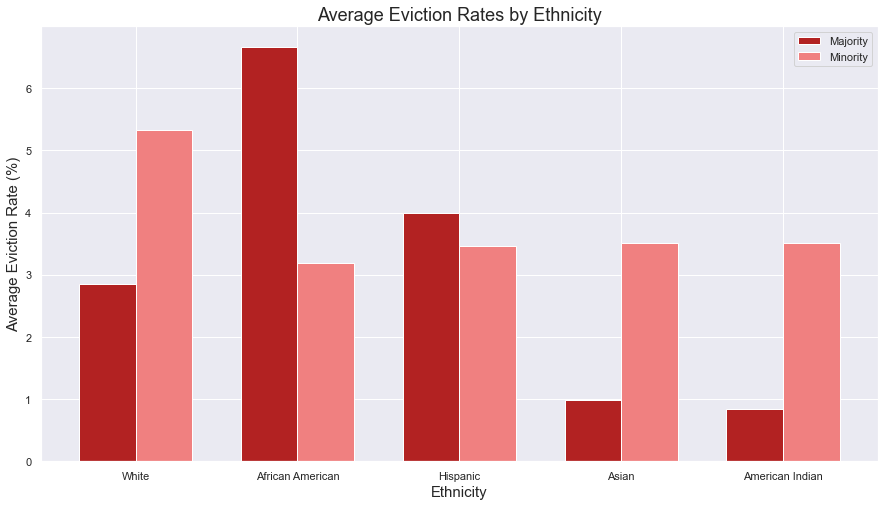

In [45]:
xval = ['White', 'African American', 'Hispanic', 'Asian', 'American Indian']
maj_yval = [maj_white['eviction.rate'].mean(), maj_afam['eviction.rate'].mean(), 
            maj_hispanic['eviction.rate'].mean(), maj_asian['eviction.rate'].mean(), 
            maj_amind['eviction.rate'].mean()]
min_yval = [min_white['eviction.rate'].mean(), min_afam['eviction.rate'].mean(), 
            min_hispanic['eviction.rate'].mean(), min_asian['eviction.rate'].mean(), 
            min_amind['eviction.rate'].mean()]

x = np.arange(len(xval))
width = 0.35


fig, ax = plt.subplots(figsize=(15,8))
ax1 = ax.bar(x - width/2, maj_yval, width, label='Majority', color = 'firebrick')
ax2 = ax.bar(x + width/2, min_yval, width, label='Minority', color = 'lightcoral')

ax.set_title('Average Eviction Rates by Ethnicity', fontsize=18)
ax.set_ylabel('Average Eviction Rate (%)', fontsize=15)
ax.set_xlabel('Ethnicity', fontsize=15)
ax.legend()
             
ax.set_xticks(x)    
ax.set_xticklabels(xval)

plt.savefig('images/ethnicity_eviction_rates.png');

# Majority Gender T-test

In [46]:
maj_male = tracts_df[tracts_df['male'] > 50.4]
min_male = tracts_df[tracts_df['male'] <= 50.4]

male_ttest = ttest_ind(maj_male['eviction.rate'], min_male['eviction.rate'])

print(male_ttest[1])
print('Majority Eviction Rate:', maj_male['eviction.rate'].median())
print('Minority Eviction Rate:', min_male['eviction.rate'].median())


1.91760880216826e-08
Majority Eviction Rate: 2.272678571428571
Minority Eviction Rate: 2.48


<AxesSubplot:xlabel='male', ylabel='eviction.rate'>

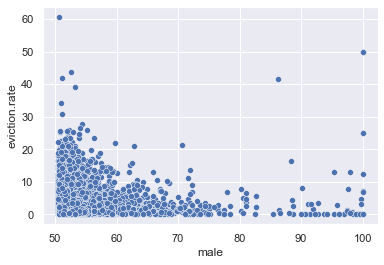

In [47]:
sns.scatterplot('male', 'eviction.rate', data=maj_male)

<AxesSubplot:xlabel='male', ylabel='eviction.rate'>

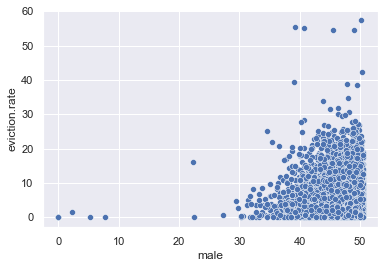

In [48]:
sns.scatterplot('male', 'eviction.rate', data=min_male)

<AxesSubplot:xlabel='male', ylabel='eviction.rate'>

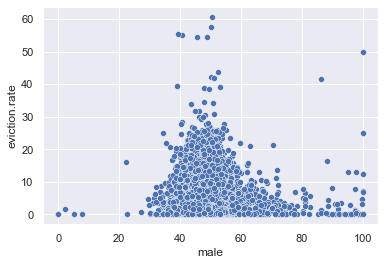

In [49]:
sns.scatterplot('male', 'eviction.rate', data=tracts_df)

In [50]:
maj_female = tracts_df[tracts_df['female'] > 50.4]
min_female = tracts_df[tracts_df['female'] <= 50.4]

female_ttest = ttest_ind(maj_female['eviction.rate'], min_female['eviction.rate'])

print(female_ttest[1])
print('Majority Eviction Rate:', maj_female['eviction.rate'].median())
print('Minority Eviction Rate:', min_female['eviction.rate'].median())


6.254226495766264e-17
Majority Eviction Rate: 2.5442727272727277
Minority Eviction Rate: 2.25


<AxesSubplot:xlabel='female', ylabel='eviction.rate'>

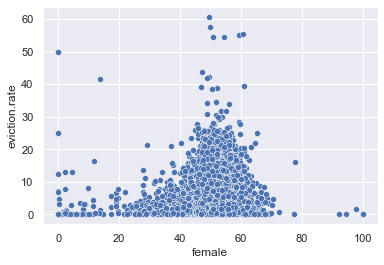

In [51]:
sns.scatterplot('female', 'eviction.rate', data=tracts_df)

**OBSERVATION**
- Eviction rates in majority female census tracts are 0.3% higher than male majority census tracts
- p-values all lower than 0.05

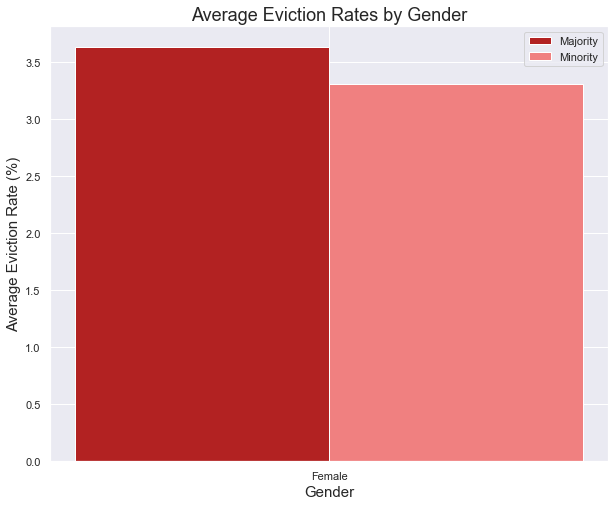

In [52]:
xval = ['Female']
maj_yval = [maj_female['eviction.rate'].mean()]
min_yval = [min_female['eviction.rate'].mean()]

x = np.arange(len(xval))
width = 0.35


fig, ax = plt.subplots(figsize=(10,8))
ax1 = ax.bar(x - width/2, maj_yval, width, label='Majority', color = 'firebrick')
ax2 = ax.bar(x + width/2, min_yval, width, label='Minority', color = 'lightcoral')

ax.set_title('Average Eviction Rates by Gender', fontsize=18)
ax.set_ylabel('Average Eviction Rate (%)', fontsize=15)
ax.set_xlabel('Gender', fontsize=15)
ax.legend()
             
ax.set_xticks(x)    
ax.set_xticklabels(xval)

plt.savefig('images/gender_eviction_rates.png');

# Rent Burden T-Test

In [53]:
tracts_df['rent.burden'].describe()

count    34612.000000
mean        29.460791
std          6.892709
min          0.000000
25%         24.960000
50%         28.542857
75%         33.033333
max         50.100000
Name: rent.burden, dtype: float64

In [54]:
above_avg_burden = tracts_df[tracts_df['rent.burden'] > 29.4]
below_avg_burden = tracts_df[tracts_df['rent.burden'] <= 29.4]

burden_ttest = ttest_ind(above_avg_burden['eviction.rate'], below_avg_burden['eviction.rate'])

print(burden_ttest[1])
print('Majority Eviction Rate:', above_avg_burden['eviction.rate'].mean())
print('Minority Eviction Rate:', below_avg_burden['eviction.rate'].mean())


5.683845506757391e-242
Majority Eviction Rate: 4.210373292249713
Minority Eviction Rate: 2.944709749913826


# Income T-Test

In [55]:
tracts_df['median.household.income'].describe()

count     34612.000000
mean      52247.938910
std       25133.508965
min           0.000000
25%       35650.600000
50%       46888.857143
75%       62878.500000
max      250001.000000
Name: median.household.income, dtype: float64

In [56]:
above_avg_income = tracts_df[tracts_df['median.household.income'] > 52247.938910]
below_avg_income = tracts_df[tracts_df['median.household.income'] <= 52247.938910]

income_ttest = ttest_ind(above_avg_income['eviction.rate'], below_avg_income['eviction.rate'])

print(income_ttest[1])
print('Above AVG Income Eviction Rate:', above_avg_income['eviction.rate'].mean())
print('Below AVG Income Eviction Rate:', below_avg_income['eviction.rate'].mean())


1.9444808085259852e-202
Above AVG Income Eviction Rate: 2.7946752263905275
Below AVG Income Eviction Rate: 3.9684907038022073


# Property Value T-Test

In [57]:
tracts_df['median.property.value'].describe()

count    3.461200e+04
mean     1.815609e+05
std      1.324891e+05
min      0.000000e+00
25%      9.660000e+04
50%      1.435795e+05
75%      2.213739e+05
max      1.714287e+06
Name: median.property.value, dtype: float64

In [58]:
above_avg_value = tracts_df[tracts_df['median.property.value'] > 1.815609e+05]
below_avg_value = tracts_df[tracts_df['median.property.value'] <= 1.815609e+05]

value_ttest = ttest_ind(above_avg_value['eviction.rate'], below_avg_value['eviction.rate'])

print(value_ttest[1])
print('Above Avg Value Eviction Rate:', above_avg_burden['eviction.rate'].mean())
print('Below Avg Value Eviction Rate:', below_avg_burden['eviction.rate'].mean())


0.0
Above Avg Value Eviction Rate: 4.210373292249713
Below Avg Value Eviction Rate: 2.944709749913826


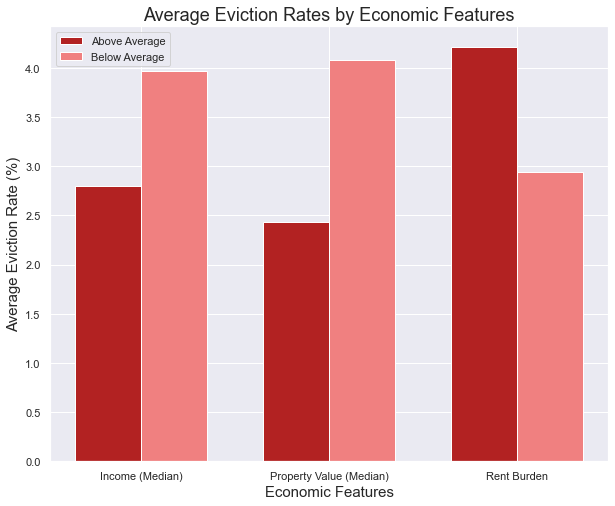

In [59]:
xval = ['Income (Median)', 'Property Value (Median)', 'Rent Burden']
maj_yval = [above_avg_income['eviction.rate'].mean(), above_avg_value['eviction.rate'].mean(),
           above_avg_burden['eviction.rate'].mean()]
min_yval = [below_avg_income['eviction.rate'].mean(), below_avg_value['eviction.rate'].mean(),
           below_avg_burden['eviction.rate'].mean()]

x = np.arange(len(xval))
width = 0.35


fig, ax = plt.subplots(figsize=(10,8))
ax1 = ax.bar(x - width/2, maj_yval, width, label='Above Average', color = 'firebrick')
ax2 = ax.bar(x + width/2, min_yval, width, label='Below Average', color = 'lightcoral')

ax.set_title('Average Eviction Rates by Economic Features', fontsize=18)
ax.set_ylabel('Average Eviction Rate (%)', fontsize=15)
ax.set_xlabel('Economic Features', fontsize=15)
ax.legend()
             
ax.set_xticks(x)    
ax.set_xticklabels(xval);

plt.savefig('images/econ_features.png')

# Modeling

### Checking Assumptions for Linear Regression

#### 1.  Multicullinearity

<AxesSubplot:>

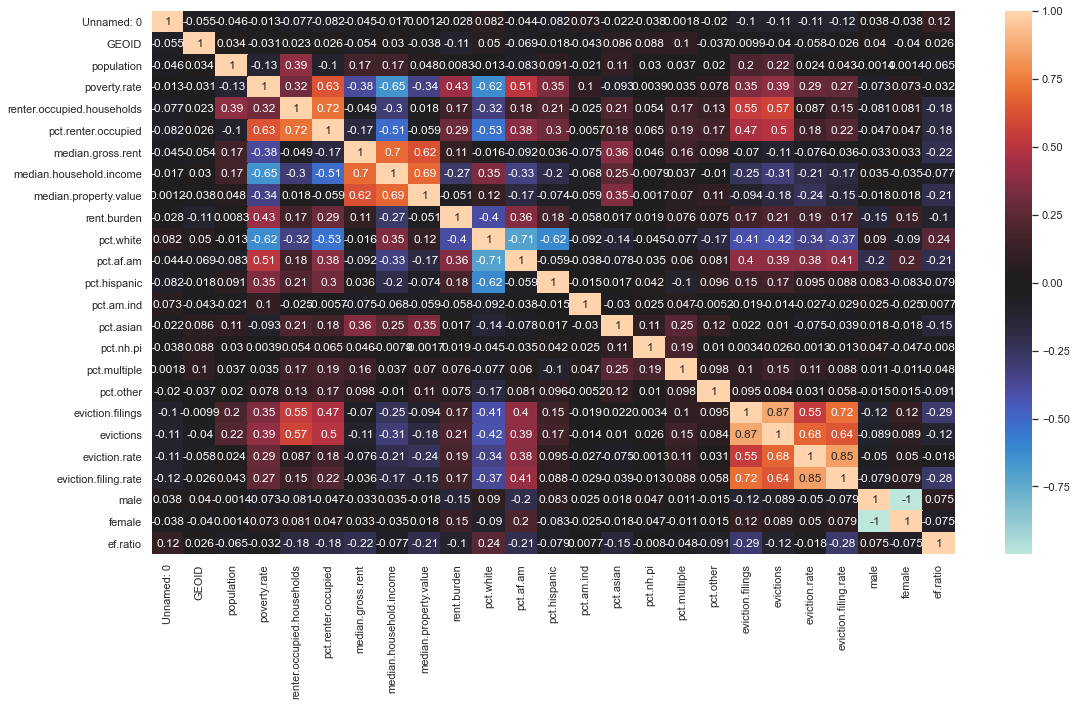

In [60]:
plt.figure(figsize=(18,10))
sns.heatmap(data = tracts_df.corr(), center=0, annot=True)

**OBSERVATION**
1. Correlations .75 and above:
    - eviction.filings vs evitions
    - eviction.filings vs eviction.filings.rate
    - male vs female
2. Dropping evictions and eviction.filing.rate as their values are reflected in eviction.filings
    - dropping renter.occupied.households (despite being slightly lower than 0.75) due to value being reflected in pct.renter.occupied
    - dropping pct.white (despite being slightly higher than -0.75) due to its value being closely related to pct.af.am
3. Dropping male column as insight will be inferrable based on findings of female variable 

In [61]:
model_df = tracts_df.drop(['evictions', 'eviction.filing.rate', 'renter.occupied.households', 
                           'Unnamed: 0', 'name', 'GEOID', 'male', 'pct.white', 'state'], axis=1)

<AxesSubplot:>

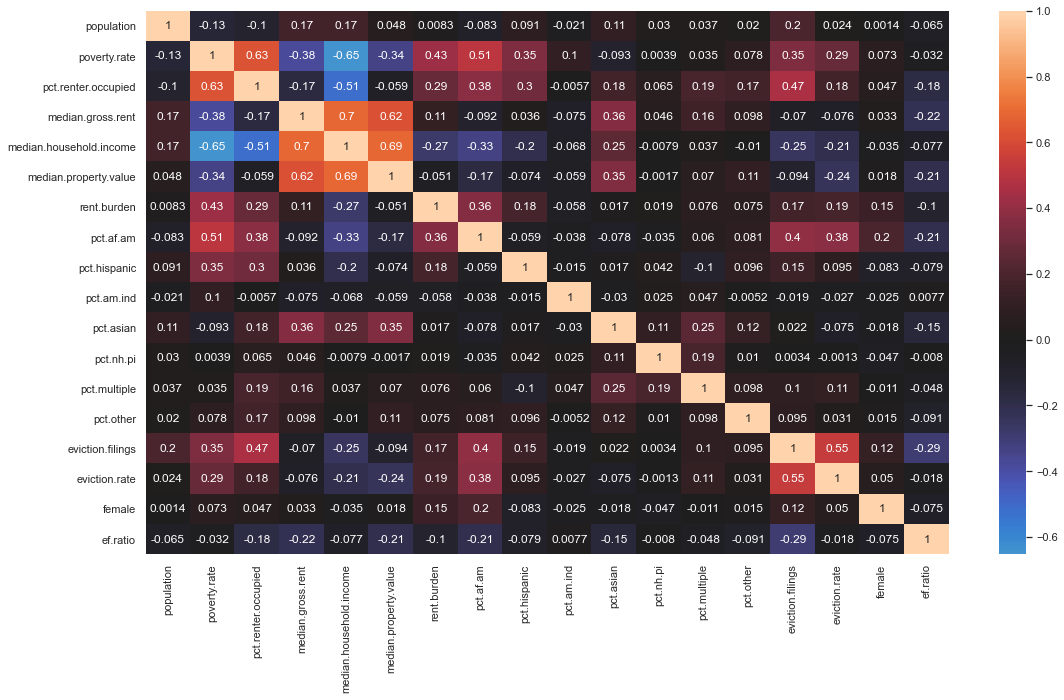

In [62]:
plt.figure(figsize=(18,10))
sns.heatmap(data = model_df.corr(), center=0, annot=True)

In [63]:
region_dummies = pd.get_dummies(tracts_df['region'], drop_first=True)
model_df = pd.concat([model_df, region_dummies], axis=1)
model_df.drop('region', axis=1, inplace=True)

In [64]:
model_df.columns = model_df.columns.str.replace(".","_")

## Linear Regression

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [66]:
def linreg_model(df, target):
    outcome = target
    predictors = df.drop(target, axis=1)
    predictor_variables = "+".join(predictors.columns)
    formula = outcome + '~' + predictor_variables
    model_baseline = ols(formula=formula, data=df).fit()
     
    X = model_df.drop("eviction_rate", axis = 1)
    y = model_df['eviction_rate']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

    baseline_linreg = LinearRegression()

    baseline_linreg.fit(X_train, y_train)

    y_pred = baseline_linreg.predict(X_test)

    residuals = y_pred - y_test
    
    
    mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
    mse_test = mean_squared_error(y_test, y_pred)

    residuals = model_baseline.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

    print("Train RMSE:", np.sqrt(mse_train))
    print("Test RMSE:", np.sqrt(mse_test))
    print('Test Difference:', np.sqrt(mse_test) - np.sqrt(mse_train))
    fig.show()
    
    return model_baseline.summary()


Train RMSE: 2.6551439574403894
Test RMSE: 2.5402239830676567
Test Difference: -0.11491997437273271


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction_rate   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     1137.
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:43:59   Log-Likelihood:                -82537.
No. Observations:               34612   AIC:                         1.651e+05
Df Residuals:                   34586   BIC:                         1.653e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.1962      0.210     10.454      0.000       1.784       2.608
population                 -0.0002   8.18e-06    -21.931      0.000      -0.000      -0.000
poverty_rate                0.0312      0.002     13.508      0.000       0.027       0.036
pct_renter_occupied        -0.0324      0.001    -29.066      0.000      -0.035      -0.030
median_gross_rent           0.0001   7.52e-05      1.788      0.074   -1.29e-05       0.000
median_household_income  1.621e-05   1.38e-06     11.769      0.000    1.35e-05    1.89e-05
median_property_value   -5.406e-06   1.91e-07    -28.374      0.000   -5.78e-06   -5.03e-06
rent_burden                 0.0252      0.003      9.691      0.000       0.020       0.030
pct_af_am                   0.0314      0.001     36.136      0.000       0.030       0.033
pct_hispanic                0.0077      0.001      7.698      0.000       0.006       0.010
pct_am_ind                 -0.0374      0.004    -10.028      0.000      -0.045      -0.030
pct_asian                   0.0093      0.003      2.921      0.003       0.003       0.015
pct_nh_pi                  -0.1142      0.039     -2.911      0.004      -0.191      -0.037
pct_multiple                0.2543      0.012     21.508      0.000       0.231       0.278
pct_other                   0.0243      0.030      0.817      0.414      -0.034       0.082
eviction_filings            0.0228      0.000    106.662      0.000       0.022       0.023
female                     -0.0285      0.003     -8.231      0.000      -0.035      -0.022
ef_ratio                    0.0268      0.001     31.456      0.000       0.025       0.028
esc                        -1.3071      0.070    -18.670      0.000      -1.444      -1.170
ma                         -0.1793      0.053     -3.366      0.001      -0.284      -0.075
mt                          1.3098      0.061     21.394      0.000       1.190       1.430
ne                         -0.1889      0.079     -2.400      0.016      -0.343      -0.035
pcf                        -0.8547      0.075    -11.324      0.000      -1.003      -0.707
sa                          0.4507      0.047      9.642      0.000       0.359       0.542
wnc                        -0.4888      0.056     -8.656      0.000      -0.599      -0.378
wsc                        -0.0668      0.061     -1.096      0.273      -0.186       0.053
==============================================================================
Omnibus:                    28437.042   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3662434.982
Skew:                           3.286   Prob(JB):                         0.00
Kurtosis:                      52.963   Cond. No.                     3.45e+06
====================

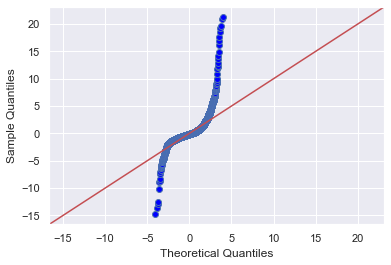

In [67]:
linreg_model(model_df, 'eviction_rate')

# Random Forrest 


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import math
import statistics as stat

In [69]:
def rf_report(classifier):
    
    # calculating variance
    var_train = explained_variance_score(y_train, classifier.predict(X_train_scaled))
    var_test = explained_variance_score(y_test, classifier.predict(X_test_scaled))
    
    #calculating max error
    max_error_train = max_error(y_train, classifier.predict(X_train_scaled))
    max_error_test = max_error(y_test, classifier.predict(X_test_scaled))
    
    #calculating RMSE
    rmse_train = math.sqrt(mean_squared_error(y_train, classifier.predict(X_train_scaled)))
    rmse_test = math.sqrt(mean_squared_error(y_test, classifier.predict(X_test_scaled)))
    
    #calculating R2
    r_sq_train = r2_score(y_train, classifier.predict(X_train_scaled))
    r_sq_test = r2_score(y_test, classifier.predict(X_test_scaled))
 

    #printing scores
    print('Variance --------------------------------------------')
    print('Train Variance: {}'.format(var_train))
    print('Test Variance: {}'.format(var_test))
    print('Max Error --------------------------------------------')
    print('Max Error Train: {}'.format(max_error_train))
    print('Max Error Test: {}'.format(max_error_test))
    print('RMSE --------------------------------------------')
    print('Train RMSE: {}'.format(rmse_train))
    print('Test RMSE: {}'.format(rmse_test))
    print('R2 --------------------------------------------')
    print('R2 Train: {}'.format(r_sq_train))
    print('R2 Test: {}'.format(r_sq_test))

    
    

### Random Forest Baseline

1. Continuing to use the same features used in the linear regression model to better compare performance

In [70]:
X = model_df.drop("eviction_rate", axis = 1)
y = model_df['eviction_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
forest_base = RandomForestRegressor()
forest_base_model = forest_base.fit(X_train_scaled, y_train)

In [72]:
rf_report(forest_base)

Variance --------------------------------------------
Train Variance: 0.973727017979217
Test Variance: 0.8110007325249959
Max Error --------------------------------------------
Max Error Train: 21.48441964285714
Max Error Test: 50.74577980769231
RMSE --------------------------------------------
Train RMSE: 0.579937714686393
Test RMSE: 1.499656974696633
R2 --------------------------------------------
R2 Train: 0.9737215936164363
R2 Test: 0.8108490610676811


In [73]:
max_depth = []
for classifier in forest_base_model:
    max_depth.append(classifier.tree_.max_depth)

In [74]:
stat.median(max_depth)

32.0

**OBSERVATION**
- While the training model is nearly completely learning the training data, it still achieves a good R2 on the testing data
- Overfitting occuring around depth of 32  

In [76]:
def plot_feature_importances_base(model):
    data={'feature_names': X_train.columns.values,'feature_importance':model.feature_importances_}
    importance_df = pd.DataFrame(data)
    importance_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    fig, ax = plt.subplots(figsize=(18,10))

    ax = sns.barplot(importance_df['feature_importance'], importance_df['feature_names'], 
                     data=importance_df, color='firebrick')

    plt.title("Feature Importance", fontsize=16)
    plt.ylabel('Features', fontsize=15)
    plt.xlabel('Importance', fontsize=15)
    plt.yticks(fontsize=12, rotation=45)
    plt.xticks(fontsize=13);

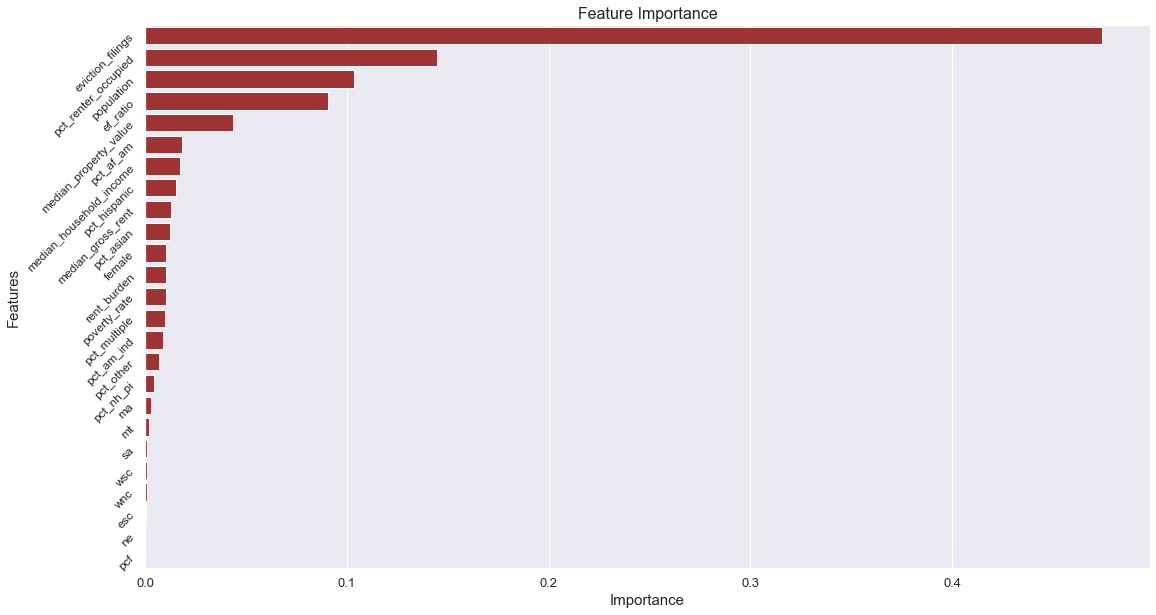

In [77]:
plot_feature_importances_base(forest_base_model)

**OBSERVATION**
- As expected, the random foreset model puts much more importance on the continuous features 
- Eviction filings are by the the most important feature, followed by pct_renter_occupied

## Random Forest v2

In [78]:
forest_v2 = RandomForestRegressor()

param_grid = {'max_depth': [20, 25, 30],
             'min_samples_split': [10, 15, 20],
             'min_samples_leaf': [20, 30, 40]}

forest_v2_model = GridSearchCV(estimator = forest_v2, param_grid=param_grid, cv=3)
forest_v2_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 25, 30],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [10, 15, 20]})

In [79]:
def report_grid(model):
    params = print(model.best_params_)
    print(params)
    return rf_report(model)

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    
    plt.barh(range(n_features), model.best_estimator_.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [80]:
report_grid(forest_v2_model)

{'max_depth': 30, 'min_samples_leaf': 20, 'min_samples_split': 10}
None
Variance --------------------------------------------
Train Variance: 0.8211990253523347
Test Variance: 0.7674716981153749
Max Error --------------------------------------------
Max Error Train: 49.00400989229651
Max Error Test: 56.724238232321085
RMSE --------------------------------------------
Train RMSE: 1.5127577639898735
Test RMSE: 1.662827777111041
R2 --------------------------------------------
R2 Train: 0.8211968770065295
R2 Test: 0.7674484816598194


**OBSERVATION**
- test R2 is lower by ~3% compared to baseline
- RMSE is higher by 0.1
- slighly worse performance after parameter optimization via gridsearch could be due to 


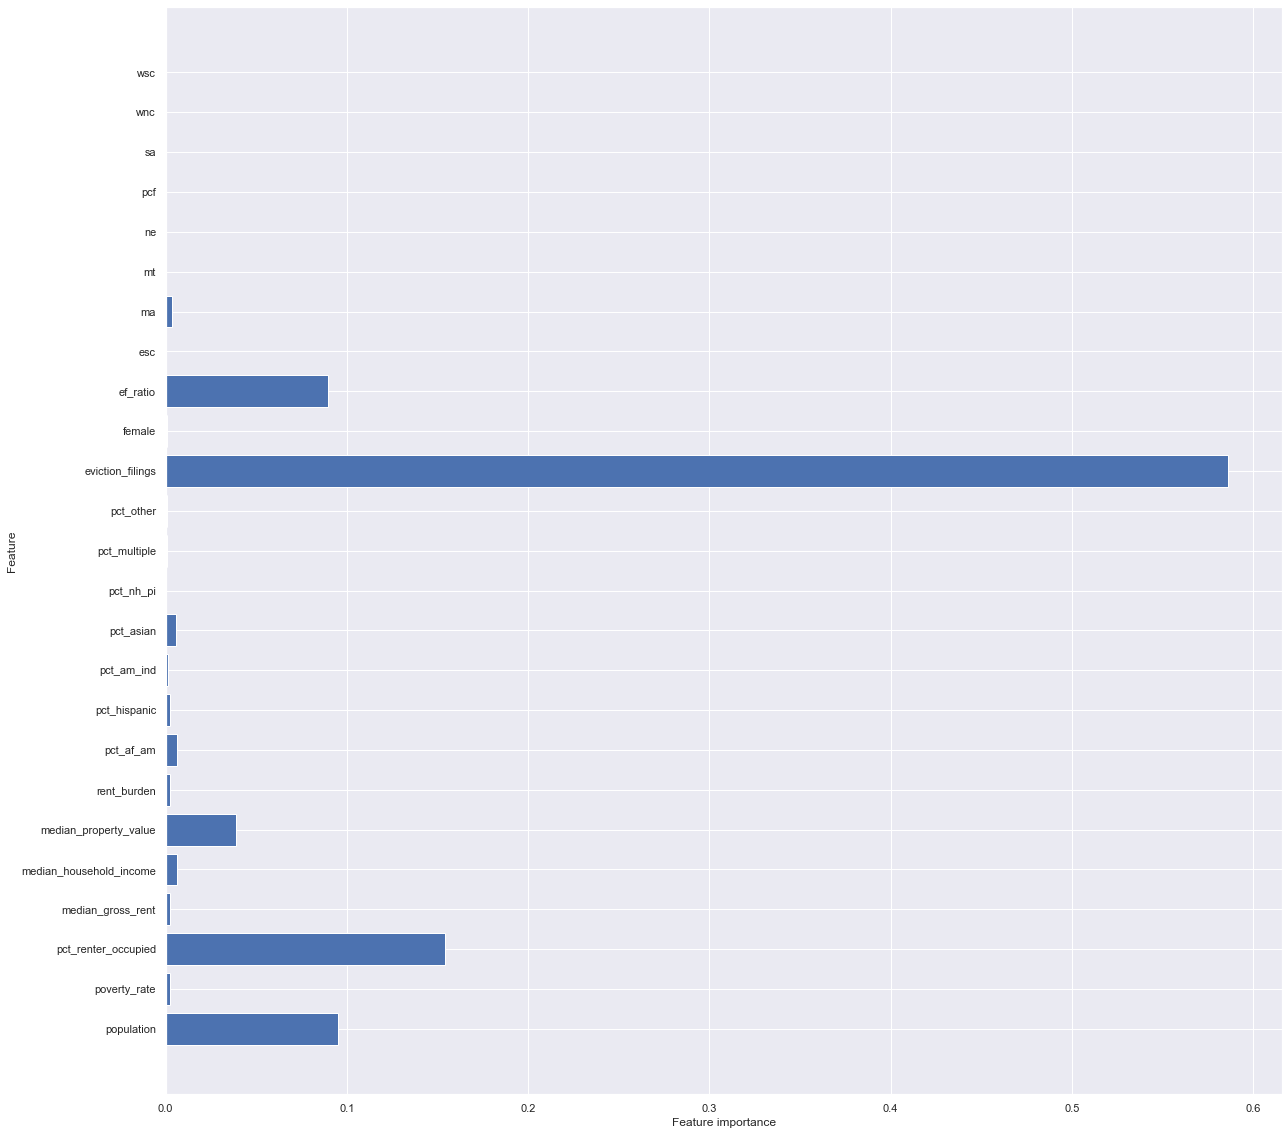

In [81]:
plot_feature_importances(forest_v2_model)

## XGBoost

In [82]:
import xgboost
from xgboost import XGBRegressor

In [83]:
xgb_base = XGBRegressor()
xgb_base_model = xgb_base.fit(X_train_scaled, y_train)

In [84]:
rf_report(xgb_base)

Variance --------------------------------------------
Train Variance: 0.9660759141042125
Test Variance: 0.8175046287249202
Max Error --------------------------------------------
Max Error Train: 8.034875233968108
Max Error Test: 53.21064682006836
RMSE --------------------------------------------
Train RMSE: 0.6589249169900555
Test RMSE: 1.4730430441168143
R2 --------------------------------------------
R2 Train: 0.9660759120935553
R2 Test: 0.8175030909002436


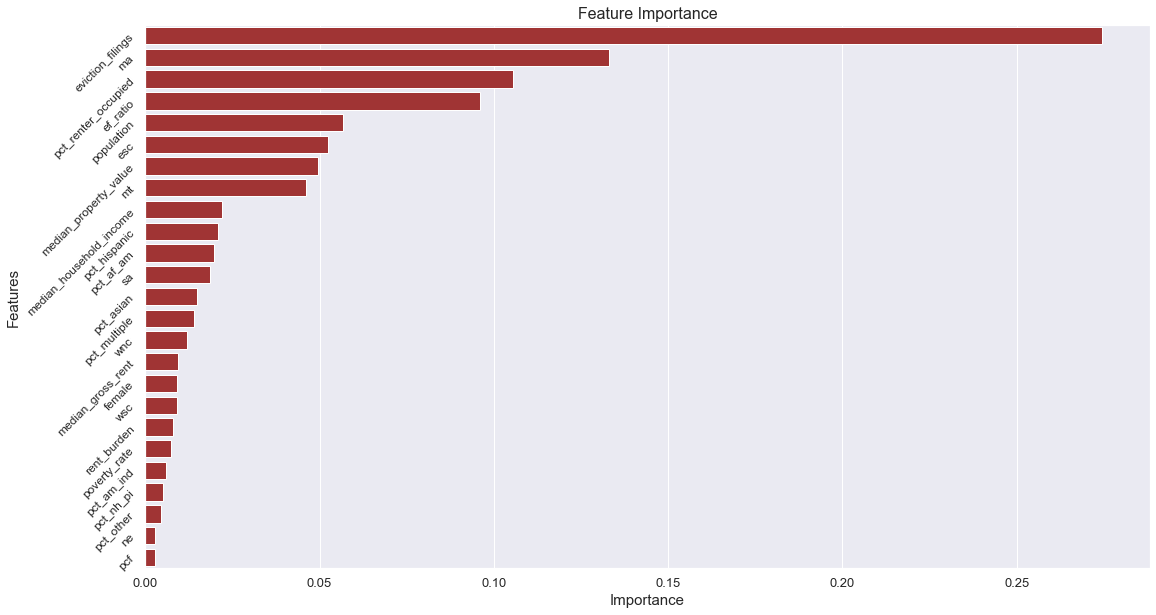

In [85]:
plot_feature_importances_base(xgb_base)

**OBSERVATION**
- This model is performing on par with the decision random forest basemodel
- XGBoost is relying more on the cateogorical (region) features than the randomforest model
    - most important regions are ma(mid atlantic) and mt (mountain)

In [86]:
xgb_v2 = XGBRegressor()

param_grid = {
    'learning_rate' : [0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 2],
    'sub_sample': [0.5, 0.7],
    
}

xgb_v2_model = GridSearchCV(estimator = xgb_v2, param_grid=param_grid, cv=3)
xgb_v2_model.fit(X_train_scaled, y_train)

[19:06:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:06:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:06:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

[19:06:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:06:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:06:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

[19:07:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:07:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:07:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

[19:08:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:08:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:08:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [87]:
report_grid(xgb_v2_model)

{'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 2, 'sub_sample': 0.5}
None
Variance --------------------------------------------
Train Variance: 0.9608377562342603
Test Variance: 0.8209095355865479
Max Error --------------------------------------------
Max Error Train: 12.93006669362386
Max Error Test: 54.16222066879273
RMSE --------------------------------------------
Train RMSE: 0.7079712757814988
Test RMSE: 1.4592308615016394
R2 --------------------------------------------
R2 Train: 0.9608377537376577
R2 Test: 0.8209094582807461


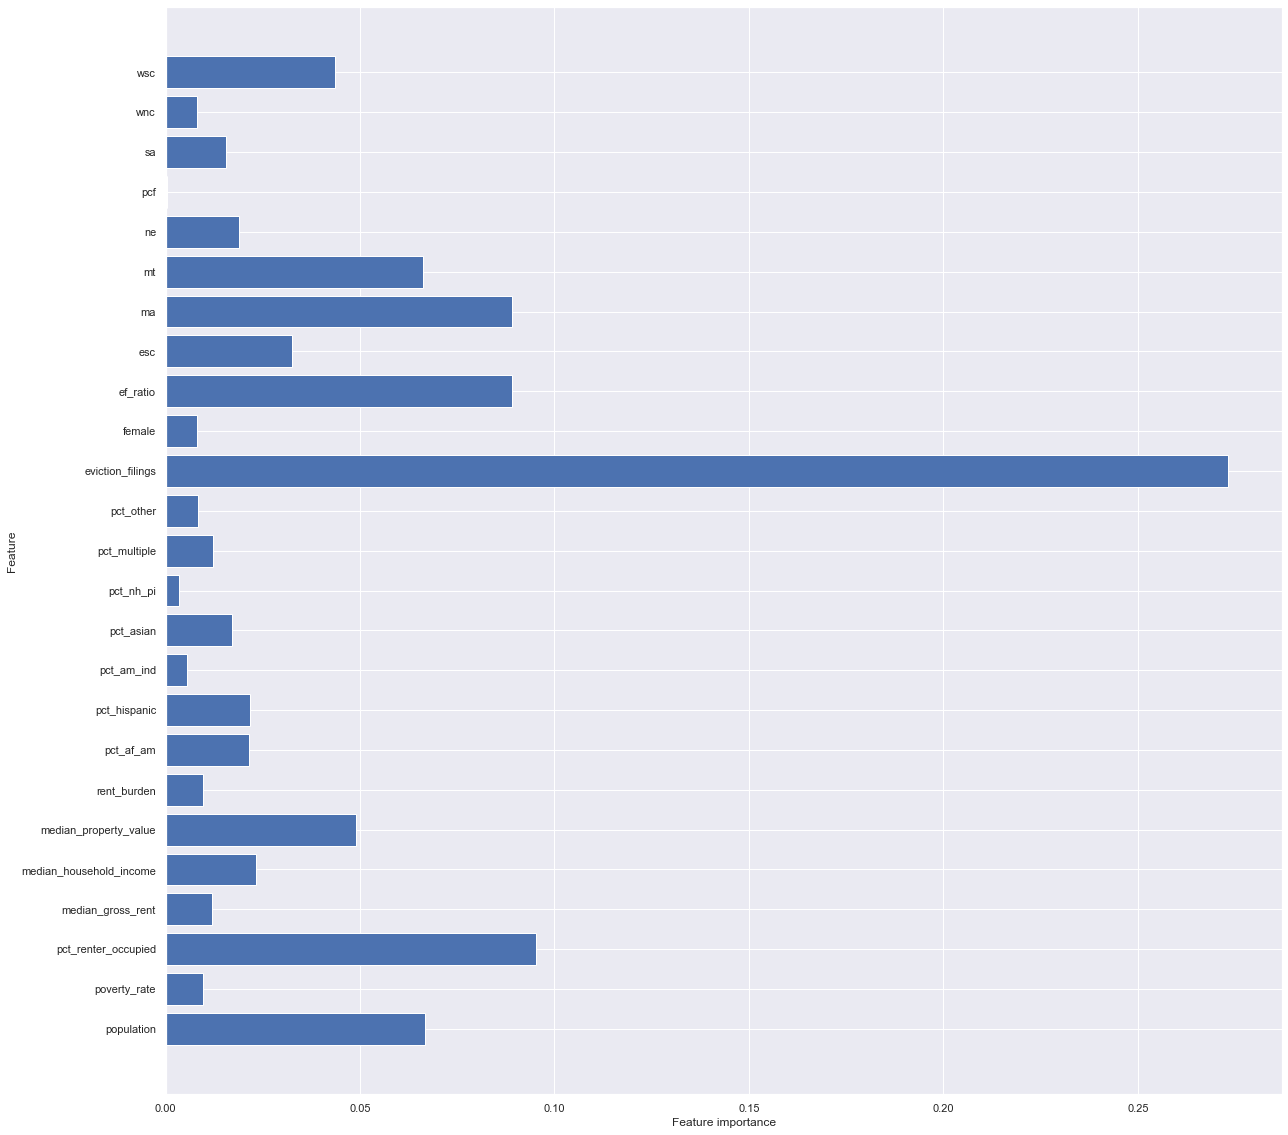

In [88]:
plot_feature_importances(xgb_v2_model)

**OBSERVATION**
- Optimization has improved R2 by 1%, and lowered RMSE by 0.04
- Placing much more importance on MT region than MA region compared to basemodel 

## MLN 

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from sklearn import metrics


In [90]:
base_nn = Sequential()
base_nn.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
base_nn.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

base_nn.compile(loss='mean_squared_error', optimizer='adam')
base_nn.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

Epoch 1/500
731/731 - 1s - loss: 10.8862 - val_loss: 6.8346
Epoch 2/500
731/731 - 1s - loss: 6.3209 - val_loss: 5.0329
Epoch 3/500
731/731 - 1s - loss: 4.8816 - val_loss: 3.9177
Epoch 4/500
731/731 - 1s - loss: 4.0239 - val_loss: 3.4507
Epoch 5/500
731/731 - 1s - loss: 3.6988 - val_loss: 3.2175
Epoch 6/500
731/731 - 1s - loss: 3.4879 - val_loss: 3.1649
Epoch 7/500
731/731 - 1s - loss: 3.3489 - val_loss: 2.9884
Epoch 8/500
731/731 - 1s - loss: 3.2421 - val_loss: 2.8653
Epoch 9/500
731/731 - 1s - loss: 3.1506 - val_loss: 2.8119
Epoch 10/500
731/731 - 1s - loss: 3.0859 - val_loss: 2.7538
Epoch 11/500
731/731 - 1s - loss: 3.0154 - val_loss: 2.6800
Epoch 12/500
731/731 - 1s - loss: 2.9604 - val_loss: 2.6320
Epoch 13/500
731/731 - 1s - loss: 2.9135 - val_loss: 2.6121
Epoch 14/500
731/731 - 1s - loss: 2.8607 - val_loss: 2.5152
Epoch 15/500
731/731 - 1s - loss: 2.8294 - val_loss: 2.5230
Epoch 16/500
731/731 - 1s - loss: 2.7832 - val_loss: 2.5123
Epoch 17/500
731/731 - 1s - loss: 2.7470 - val_l

In [91]:
pred = base_nn.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


Final score (RMSE): 1.4985047484440253


In [92]:
print(r2_score(y_train, base_nn.predict(X_train_scaled)))
print(r2_score(y_test, base_nn.predict(X_test_scaled)))

0.8521073590600005
0.8111396087794303


### Deeper Network 

In [93]:
nn_v2 = Sequential()
nn_v2.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
nn_v2.add(Dense(16, activation='relu'))
nn_v2.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

nn_v2.compile(loss='mean_squared_error', optimizer='adam')
nn_v2.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

Epoch 1/500
731/731 - 1s - loss: 9.3778 - val_loss: 6.0648
Epoch 2/500
731/731 - 1s - loss: 5.4695 - val_loss: 4.0531
Epoch 3/500
731/731 - 1s - loss: 3.9540 - val_loss: 3.1436
Epoch 4/500
731/731 - 1s - loss: 3.4117 - val_loss: 2.8469
Epoch 5/500
731/731 - 1s - loss: 3.0861 - val_loss: 2.5708
Epoch 6/500
731/731 - 1s - loss: 2.8653 - val_loss: 2.4227
Epoch 7/500
731/731 - 1s - loss: 2.6999 - val_loss: 2.4239
Epoch 8/500
731/731 - 1s - loss: 2.5657 - val_loss: 2.2538
Epoch 9/500
731/731 - 1s - loss: 2.4519 - val_loss: 2.1637
Epoch 10/500
731/731 - 1s - loss: 2.3561 - val_loss: 2.1420
Epoch 11/500
731/731 - 1s - loss: 2.2601 - val_loss: 2.0027
Epoch 12/500
731/731 - 1s - loss: 2.2003 - val_loss: 1.9937
Epoch 13/500
731/731 - 1s - loss: 2.1355 - val_loss: 2.0138
Epoch 14/500
731/731 - 1s - loss: 2.0819 - val_loss: 1.9547
Epoch 15/500
731/731 - 1s - loss: 2.0262 - val_loss: 2.0775
Epoch 16/500
731/731 - 1s - loss: 1.9791 - val_loss: 1.9297
Epoch 17/500
731/731 - 1s - loss: 1.9304 - val_lo

In [94]:
pred = nn_v2.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


Final score (RMSE): 1.4644358418836276


In [95]:
print(r2_score(y_train, nn_v2.predict(X_train_scaled)))
print(r2_score(y_test, nn_v2.predict(X_test_scaled)))

0.8776159399232343
0.819629571372559


## Different Features

- Considering eviction.filings is consistantly the most important feature, it is worth running basemodels that utilize eviction.filing.rate
- Based on the eviction.filing.rate and eviction.rate calculations (# eviction filings; evictions/# renter occupied households), I will need to drop any features that would give the model the ability to perfectly calculate the eviction rate

In [96]:
drop_pop_df = tracts_df.drop(['renter.occupied.households', 'pct.renter.occupied', 'ef.ratio', 'eviction.filings', 'Unnamed: 0', 'name', 'GEOID', 
                              'male', 'pct.white', 'state'], axis=1)

In [97]:
region_dummies = pd.get_dummies(drop_pop_df['region'], drop_first=True)
drop_pop_df = pd.concat([drop_pop_df, region_dummies], axis=1)
drop_pop_df.drop('region', axis=1, inplace=True)

In [98]:
X = drop_pop_df.drop("eviction.rate", axis = 1)
y = drop_pop_df['eviction.rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
xgb_base = XGBRegressor()
xgb_base_model = xgb_base.fit(X_train_scaled, y_train)

In [100]:
rf_report(xgb_base)

Variance --------------------------------------------
Train Variance: 0.9760190436447717
Test Variance: 0.8929972214172248
Max Error --------------------------------------------
Max Error Train: 4.598149871826173
Max Error Test: 25.55285568237305
RMSE --------------------------------------------
Train RMSE: 0.5540068077052184
Test RMSE: 1.1281099662807605
R2 --------------------------------------------
R2 Train: 0.9760190423737297
R2 Test: 0.8929645818427344


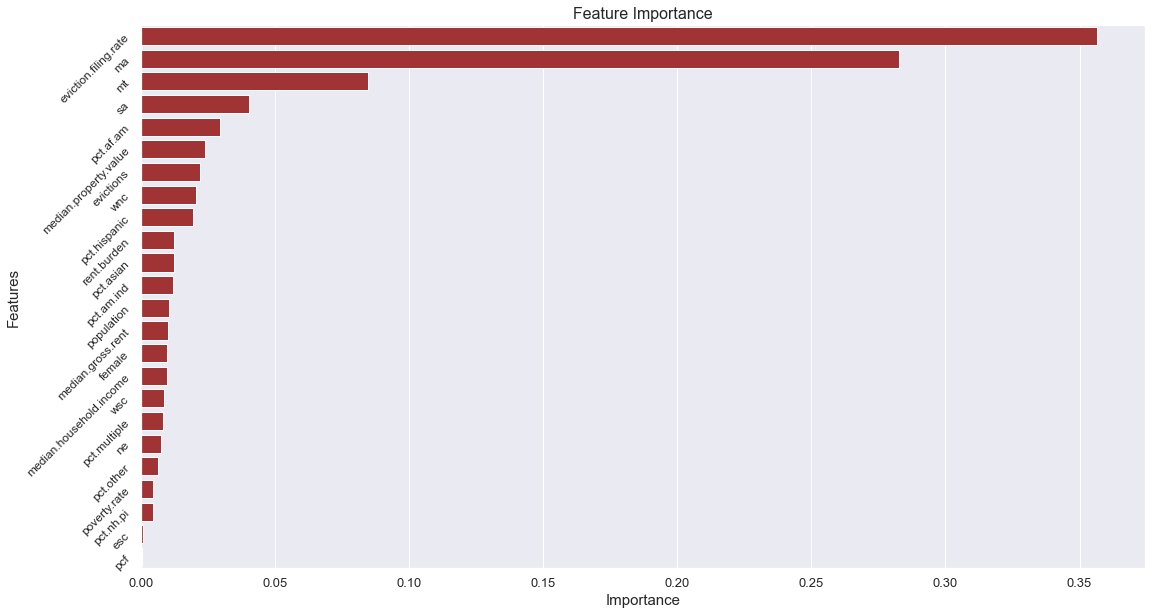

In [101]:
plot_feature_importances_base(xgb_base_model)

In [102]:
xgb_v2 = XGBRegressor()

param_grid = {
    'learning_rate' : [0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 2],
    'sub_sample': [0.5, 0.7],
    
}

xgb_v2_model = GridSearchCV(estimator = xgb_v2, param_grid=param_grid, cv=3)
xgb_v2_model.fit(X_train_scaled, y_train)

[19:13:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:13:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:13:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

[19:24:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

[20:02:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:02:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:02:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

[20:03:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:03:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:03:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [103]:
report_grid(xgb_v2_model)

{'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 2, 'sub_sample': 0.5}
None
Variance --------------------------------------------
Train Variance: 0.9682715004563982
Test Variance: 0.8976130895795574
Max Error --------------------------------------------
Max Error Train: 7.789453887939452
Max Error Test: 27.477420043945315
RMSE --------------------------------------------
Train RMSE: 0.6372452521061793
Test RMSE: 1.1034693992285847
R2 --------------------------------------------
R2 Train: 0.9682715003828244
R2 Test: 0.8975893255811879


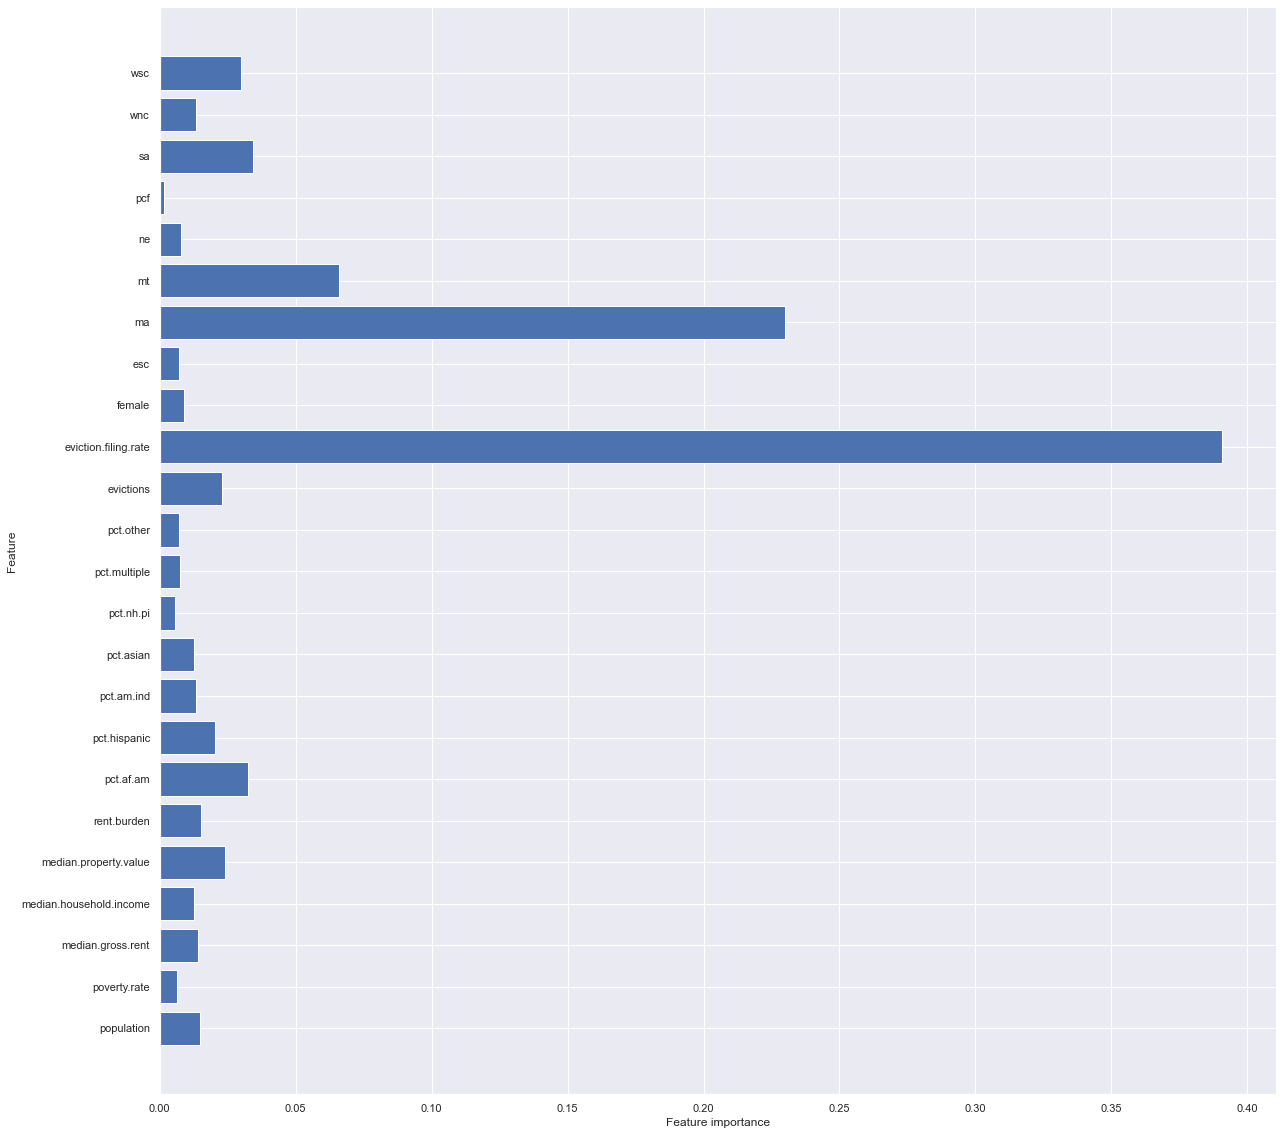

In [104]:
plot_feature_importances(xgb_v2_model)

## MLN 

In [105]:
base_nn = Sequential()
base_nn.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
base_nn.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

base_nn.compile(loss='mean_squared_error', optimizer='adam')
base_nn.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

Epoch 1/500
731/731 - 1s - loss: 5.9114 - val_loss: 2.4293
Epoch 2/500
731/731 - 1s - loss: 2.3759 - val_loss: 1.9065
Epoch 3/500
731/731 - 1s - loss: 2.1316 - val_loss: 1.8064
Epoch 4/500
731/731 - 1s - loss: 2.0245 - val_loss: 1.6946
Epoch 5/500
731/731 - 1s - loss: 1.9419 - val_loss: 1.6521
Epoch 6/500
731/731 - 1s - loss: 1.8877 - val_loss: 1.6012
Epoch 7/500
731/731 - 1s - loss: 1.8524 - val_loss: 1.5741
Epoch 8/500
731/731 - 1s - loss: 1.8184 - val_loss: 1.5788
Epoch 9/500
731/731 - 1s - loss: 1.7905 - val_loss: 1.5197
Epoch 10/500
731/731 - 1s - loss: 1.7676 - val_loss: 1.5426
Epoch 11/500
731/731 - 1s - loss: 1.7487 - val_loss: 1.5198
Epoch 12/500
731/731 - 1s - loss: 1.7381 - val_loss: 1.4977
Epoch 13/500
731/731 - 1s - loss: 1.7125 - val_loss: 1.4975
Epoch 14/500
731/731 - 1s - loss: 1.7004 - val_loss: 1.5164
Epoch 15/500
731/731 - 1s - loss: 1.6816 - val_loss: 1.4772
Epoch 16/500
731/731 - 1s - loss: 1.6660 - val_loss: 1.4507
Epoch 17/500
731/731 - 1s - loss: 1.6613 - val_lo

In [106]:
pred = base_nn.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


Final score (RMSE): 1.1759962737111107


In [107]:
print(r2_score(y_train, base_nn.predict(X_train_scaled)))
print(r2_score(y_test, base_nn.predict(X_test_scaled)))

0.8891368279254855
0.8836847845952706


### Deeper Network 

In [108]:
nn_v2 = Sequential()
nn_v2.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
nn_v2.add(Dense(16, activation='relu'))
nn_v2.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

nn_v2.compile(loss='mean_squared_error', optimizer='adam')
nn_v2.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

Epoch 1/500
731/731 - 1s - loss: 5.4283 - val_loss: 2.3087
Epoch 2/500
731/731 - 1s - loss: 2.3178 - val_loss: 1.8024
Epoch 3/500
731/731 - 1s - loss: 2.0495 - val_loss: 1.7216
Epoch 4/500
731/731 - 1s - loss: 1.9385 - val_loss: 1.6034
Epoch 5/500
731/731 - 1s - loss: 1.8458 - val_loss: 1.5980
Epoch 6/500
731/731 - 1s - loss: 1.7965 - val_loss: 1.5168
Epoch 7/500
731/731 - 1s - loss: 1.7472 - val_loss: 1.4727
Epoch 8/500
731/731 - 1s - loss: 1.6980 - val_loss: 1.4489
Epoch 9/500
731/731 - 1s - loss: 1.6553 - val_loss: 1.3874
Epoch 10/500
731/731 - 1s - loss: 1.6138 - val_loss: 1.3760
Epoch 11/500
731/731 - 1s - loss: 1.5932 - val_loss: 1.3915
Epoch 12/500
731/731 - 1s - loss: 1.5488 - val_loss: 1.3940
Epoch 13/500
731/731 - 1s - loss: 1.5161 - val_loss: 1.3647
Epoch 14/500
731/731 - 1s - loss: 1.5007 - val_loss: 1.3681
Epoch 15/500
731/731 - 1s - loss: 1.4818 - val_loss: 1.3718
Epoch 16/500
731/731 - 1s - loss: 1.4600 - val_loss: 1.3815
Epoch 17/500
731/731 - 1s - loss: 1.4487 - val_lo

In [109]:
pred = nn_v2.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


Final score (RMSE): 1.1394071906256404


In [110]:
print(r2_score(y_train, nn_v2.predict(X_train_scaled)))
print(r2_score(y_test, nn_v2.predict(X_test_scaled)))

0.9047901272539041
0.8908100794880903


### Wider Network 

In [111]:
nn_v2 = Sequential()
nn_v2.add(Dense(X.shape[1]*2, input_dim=X.shape[1], activation='relu'))
nn_v2.add(Dense(25, activation='relu'))
nn_v2.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

nn_v2.compile(loss='mean_squared_error', optimizer='adam')
nn_v2.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

Epoch 1/500
731/731 - 1s - loss: 4.2142 - val_loss: 1.9681
Epoch 2/500
731/731 - 1s - loss: 2.0717 - val_loss: 1.6916
Epoch 3/500
731/731 - 1s - loss: 1.8881 - val_loss: 1.5614
Epoch 4/500
731/731 - 1s - loss: 1.7876 - val_loss: 1.4887
Epoch 5/500
731/731 - 1s - loss: 1.6820 - val_loss: 1.5462
Epoch 6/500
731/731 - 1s - loss: 1.6003 - val_loss: 1.4264
Epoch 7/500
731/731 - 1s - loss: 1.5419 - val_loss: 1.3951
Epoch 8/500
731/731 - 1s - loss: 1.4768 - val_loss: 1.3706
Epoch 9/500
731/731 - 1s - loss: 1.4188 - val_loss: 1.3406
Epoch 10/500
731/731 - 1s - loss: 1.3698 - val_loss: 1.4417
Epoch 11/500
731/731 - 1s - loss: 1.3376 - val_loss: 1.3692
Epoch 12/500
731/731 - 1s - loss: 1.3372 - val_loss: 1.3296
Epoch 13/500
731/731 - 1s - loss: 1.2955 - val_loss: 1.3070
Epoch 14/500
731/731 - 1s - loss: 1.2679 - val_loss: 1.2937
Epoch 15/500
731/731 - 1s - loss: 1.2348 - val_loss: 1.3792
Epoch 16/500
731/731 - 1s - loss: 1.2144 - val_loss: 1.3509
Epoch 17/500
731/731 - 1s - loss: 1.1875 - val_lo

In [112]:
pred = nn_v2.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


print(r2_score(y_train, nn_v2.predict(X_train_scaled)))
print(r2_score(y_test, nn_v2.predict(X_test_scaled)))

Final score (RMSE): 1.1347636110097825
0.9217746848169567
0.8916982587188714


In [113]:
nn_v2 = Sequential()
nn_v2.add(Dense(X.shape[1]*2, input_dim=X.shape[1], activation='relu'))
nn_v2.add(Dense(25, activation='relu'))
nn_v2.add(Dense(16, activation='relu'))
nn_v2.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

nn_v2.compile(loss='mean_squared_error', optimizer='adam')
nn_v2.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

Epoch 1/500
731/731 - 1s - loss: 4.1580 - val_loss: 2.0002
Epoch 2/500
731/731 - 1s - loss: 2.0475 - val_loss: 1.6405
Epoch 3/500
731/731 - 1s - loss: 1.8300 - val_loss: 1.5403
Epoch 4/500
731/731 - 1s - loss: 1.6983 - val_loss: 1.6175
Epoch 5/500
731/731 - 1s - loss: 1.6139 - val_loss: 1.4098
Epoch 6/500
731/731 - 1s - loss: 1.5281 - val_loss: 1.3584
Epoch 7/500
731/731 - 1s - loss: 1.4572 - val_loss: 1.3379
Epoch 8/500
731/731 - 1s - loss: 1.4001 - val_loss: 1.3219
Epoch 9/500
731/731 - 1s - loss: 1.3544 - val_loss: 1.3110
Epoch 10/500
731/731 - 1s - loss: 1.3035 - val_loss: 1.3187
Epoch 11/500
731/731 - 1s - loss: 1.2682 - val_loss: 1.4528
Epoch 12/500
731/731 - 1s - loss: 1.2322 - val_loss: 1.3196
Epoch 13/500
731/731 - 1s - loss: 1.1837 - val_loss: 1.2202
Epoch 14/500
731/731 - 1s - loss: 1.1751 - val_loss: 1.2971
Epoch 15/500
731/731 - 1s - loss: 1.1535 - val_loss: 1.3189
Epoch 16/500
731/731 - 1s - loss: 1.1481 - val_loss: 1.2511
Epoch 17/500
731/731 - 1s - loss: 1.0944 - val_lo

In [114]:
pred = nn_v2.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


print(r2_score(y_train, nn_v2.predict(X_train_scaled)))
print(r2_score(y_test, nn_v2.predict(X_test_scaled)))

Final score (RMSE): 1.126399672153742
0.9310392624102526
0.8932888822833821


**OBSERVATION**
- Performance of XGBoost and MLN are nearly identical, with XGBoost getting slightly better results
- I will continue with XGBoost because of its better results and because interpretation will be easier 

# Outlier Detection and Removal

**OBSERVATION**
- Thus far the highest r2 values achieved have been 89% (XGBoost)
- Considering I have not removed any outliers after initial cleaning, detecting and removing these outliers could yield better results

## Isolation Forest

- I am starting with Isolation Forset as it functions well with multi-dimensional data

In [115]:
from sklearn.ensemble import IsolationForest

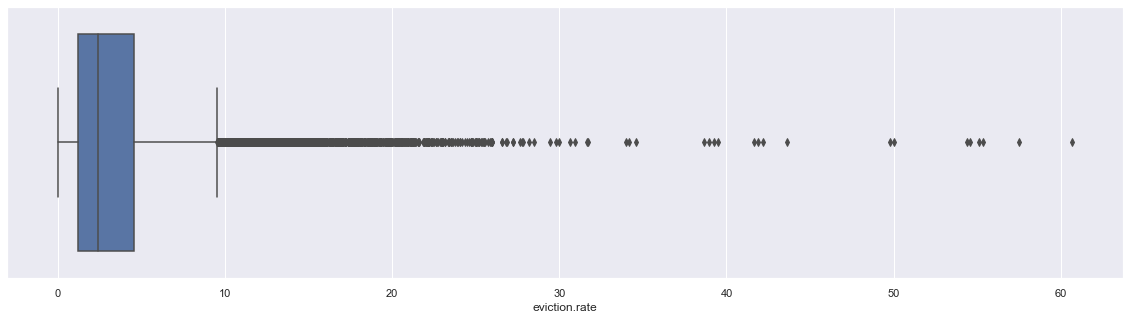

In [116]:
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(y)

In [117]:
outliers = y > 9

In [118]:
len(y)/outliers.sum()

14.500209467951404

**OBSERVATION**
- Based on the boxplot and calculation above, approx 15% of eviction rates are outliers
- I will use this percentage as the maximum contamination, and train several models with decreasing contaminations to see which gives the best R2

In [119]:
i = [0.15, 0.12, 0.1, 0.08, 0.06, 0.04, 0.02, 0.01, 0.005]


In [120]:
def iso_forest(contamination_list):

    contamination_dict = {}

    for contamination in contamination_list:
        print('CURRENT CONTAMINATION: ', contamination)
        
        #fitting IsolationForest to all data
        isoforest = IsolationForest(contamination = contamination, n_estimators=drop_pop_df.shape[1], random_state=42)
        isoforest_model =isoforest.fit(X)
        
        #assinging IsolationForest predictions (-1 = Outlier, 1 = Non-Outlier) 
        eviction_rate_outliers = pd.Series(isoforest_model.predict(X))

        
        iso_df = tracts_df.drop(['renter.occupied.households', 'pct.renter.occupied', 'ef.ratio', 'eviction.filings', 
                                 'Unnamed: 0', 'name', 'GEOID', 
                                  'male', 'pct.white', 'state'], axis=1)
        region_dummies = pd.get_dummies(iso_df['region'], drop_first=True)
        iso_df = pd.concat([iso_df, region_dummies], axis=1)
        iso_df.drop('region', axis=1, inplace=True)

        iso_tracts = iso_df
        iso_tracts.reset_index(inplace=True)
        iso_tracts.drop('index', axis=1, inplace=True)

        #iterating through IsolationForest predictions
        for i in range(len(eviction_rate_outliers)):
            if eviction_rate_outliers[i] == -1:
                #if the datapoint is an outlier, drop it from the dataset
                iso_tracts.drop(i, inplace=True)


        #preprocessing data        
        X2 = iso_tracts.drop("eviction.rate", axis = 1)
        y2 = iso_tracts['eviction.rate']

        #making certain variable accessible outside of function to be later used in gridsearch optimization
        X2_train, X2_test, iso_forest.y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 25)

        #scaling data
        scaler = StandardScaler()

        iso_forest.X2_train_scaled = scaler.fit_transform(X2_train)
        X2_test_scaled = scaler.transform(X2_test)
    
        #training model on OUTLIER REMOVED data
        iso_forest.xgb_iso = XGBRegressor().fit(iso_forest.X2_train_scaled, iso_forest.y2_train)
        
        rf_report(iso_forest.xgb_iso)
        
        #populating contamination_dict with contamination's corresponding R2 score
        #model is tested on FULL DATA (outliers included)
        contamination_dict[str(contamination)] = r2_score(y_test, iso_forest.xgb_iso.predict(X_test_scaled))   
    print(contamination_dict)

In [121]:
iso_forest(i)

CURRENT CONTAMINATION:  0.15
Variance --------------------------------------------
Train Variance: 0.8512968439896496
Test Variance: 0.874851444798172
Max Error --------------------------------------------
Max Error Train: 43.089692164201004
Max Error Test: 24.178755950927737
RMSE --------------------------------------------
Train RMSE: 1.4059513554652374
Test RMSE: 1.2456935113242846
R2 --------------------------------------------
R2 Train: 0.8455539134325731
R2 Test: 0.8694890224663827
CURRENT CONTAMINATION:  0.12
Variance --------------------------------------------
Train Variance: 0.871535734383533
Test Variance: 0.865687908939196
Max Error --------------------------------------------
Max Error Train: 41.309637298583986
Max Error Test: 53.924300861358645
RMSE --------------------------------------------
Train RMSE: 1.2991417398191418
Test RMSE: 1.2773554920781156
R2 --------------------------------------------
R2 Train: 0.8681289720662051
R2 Test: 0.8627702736636467
CURRENT CONTAMI

**OBSERVATION**
- Contamination = 0.005 returns best R2(0.943) and RMSE(0.822)
    - overall improvement of ~5% R2 compared to best performing model before outlier removal
- Testing set outperforms training set, this suggests that the model is well generalized 

In [122]:
iso_forest([0.001, 0.0005, 0.00001 ])

CURRENT CONTAMINATION:  0.001
Variance --------------------------------------------
Train Variance: 0.9453244429976554
Test Variance: 0.9418981921616099
Max Error --------------------------------------------
Max Error Train: 35.36319923400879
Max Error Test: 12.085171127319335
RMSE --------------------------------------------
Train RMSE: 0.8365395347275469
Test RMSE: 0.8316343901207284
R2 --------------------------------------------
R2 Train: 0.9453224231344023
R2 Test: 0.9418312785116154
CURRENT CONTAMINATION:  0.0005
Variance --------------------------------------------
Train Variance: 0.9467318365657652
Test Variance: 0.9436749030499723
Max Error --------------------------------------------
Max Error Train: 27.21333679199219
Max Error Test: 11.03135597229004
RMSE --------------------------------------------
Train RMSE: 0.8258112700517636
Test RMSE: 0.8191410437683143
R2 --------------------------------------------
R2 Train: 0.946715863785838
R2 Test: 0.9435658468522696
CURRENT CONTA

In [123]:
iso_forest([0.0005])

CURRENT CONTAMINATION:  0.0005
Variance --------------------------------------------
Train Variance: 0.9467318365657652
Test Variance: 0.9436749030499723
Max Error --------------------------------------------
Max Error Train: 27.21333679199219
Max Error Test: 11.03135597229004
RMSE --------------------------------------------
Train RMSE: 0.8258112700517636
Test RMSE: 0.8191410437683143
R2 --------------------------------------------
R2 Train: 0.946715863785838
R2 Test: 0.9435658468522696
{'0.0005': 0.9435658468522696}


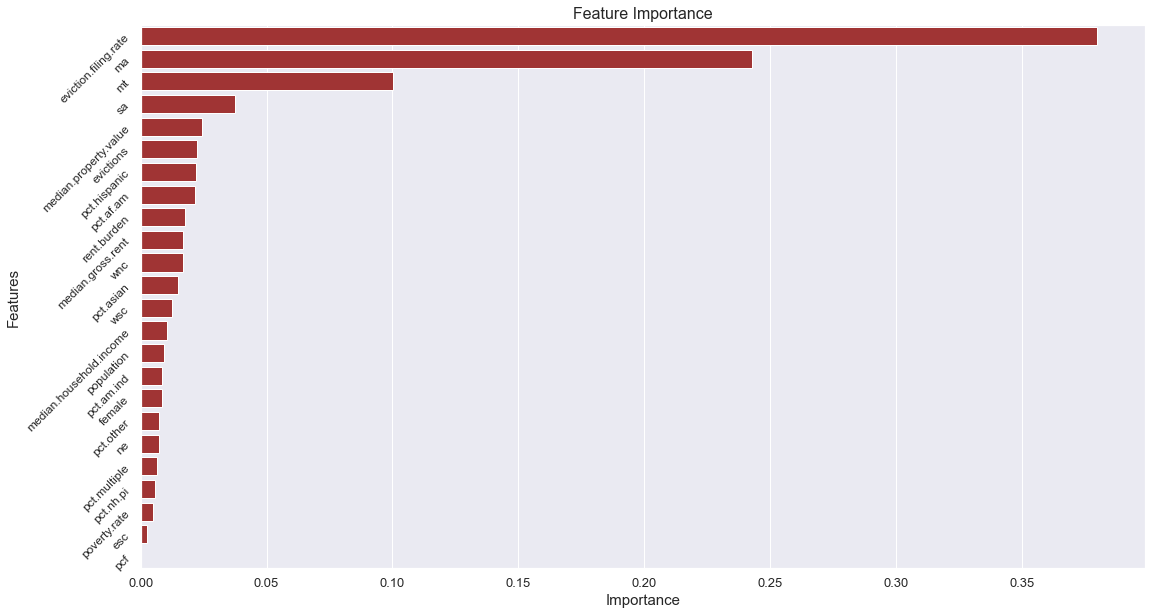

In [124]:
plot_feature_importances_base(iso_forest.xgb_iso)

**OBSERVATION**
- Feature importances have not changed much

In [125]:
param_grid = {
    'learning_rate' : [0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 2],
    'sub_sample': [0.5, 0.7],
    
}

xgb_iso_model = GridSearchCV(estimator = XGBRegressor(), param_grid=param_grid, cv=3).fit(iso_forest.X2_train_scaled, iso_forest.y2_train)


[20:09:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:09:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:09:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

[20:10:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:10:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:10:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

[20:11:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:11:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:11:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

[20:12:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:12:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:12:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

In [126]:
rf_report(xgb_iso_model)

Variance --------------------------------------------
Train Variance: 0.9437724936844678
Test Variance: 0.9410827883037536
Max Error --------------------------------------------
Max Error Train: 25.655917485555022
Max Error Test: 10.00934898376465
RMSE --------------------------------------------
Train RMSE: 0.8483937417676859
Test RMSE: 0.8375811677521632
R2 --------------------------------------------
R2 Train: 0.9437618233792284
R2 Test: 0.9409964086930935


**OBSERVATION**
- Grid optimization does not lead to improvements 

# Permutation Importance

- Feature importances for tree based models can often be misleading 
- Plotting permutation importances may offer additional insight into how the model is using features

In [127]:
from sklearn.inspection import permutation_importance

result = permutation_importance(iso_forest.xgb_iso, X_test_scaled, y_test, n_repeats=10, random_state=0)

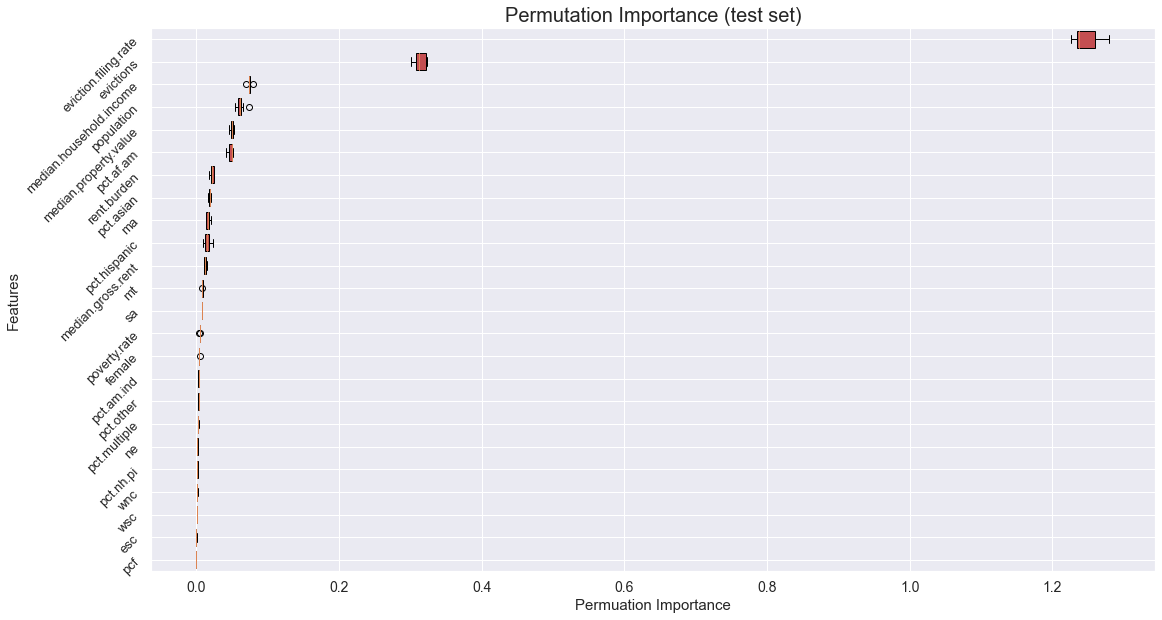

In [128]:
fig, ax = plt.subplots(figsize=(18,10))
sorted_idx = result.importances_mean.argsort()

ax = ax.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X_train.columns)[sorted_idx],
            widths=.75, patch_artist=True, boxprops=dict(facecolor='r'))

plt.title("Permutation Importance (test set)", fontsize=20)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Permuation Importance', fontsize=15)
plt.yticks(fontsize=13, rotation = 45)
plt.xticks(fontsize=14)


plt.show()

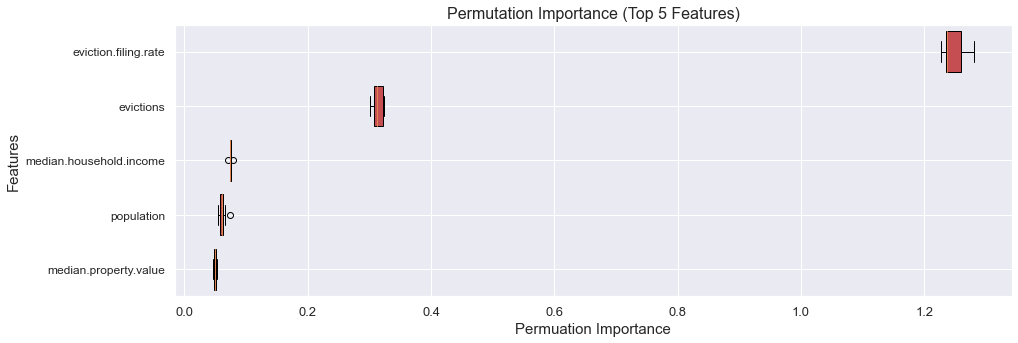

In [129]:
plt.subplots(figsize=(15,5))
sorted_idx = result.importances_mean.argsort()[19:24]

plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X_train.columns)[sorted_idx], widths=.75,
           patch_artist=True, boxprops=dict(facecolor='r'))

plt.title("Permutation Importance (Top 5 Features)", fontsize=16)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Permuation Importance', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=13)

plt.savefig('images/perm_top5.png')

plt.show()

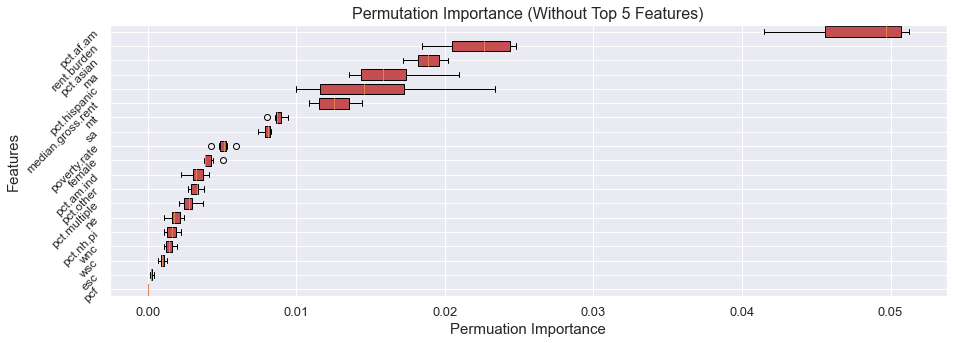

In [130]:
plt.subplots(figsize=(15,5))
sorted_idx = result.importances_mean.argsort()[:19]

plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X_train.columns)[sorted_idx], widths=.75,
           patch_artist=True, boxprops=dict(facecolor='r'))

plt.title("Permutation Importance (Without Top 5 Features)", fontsize=16)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Permuation Importance', fontsize=15)
plt.yticks(fontsize=12, rotation=45)
plt.xticks(fontsize=13)

plt.savefig('images/perm_bottom.png')


plt.show()

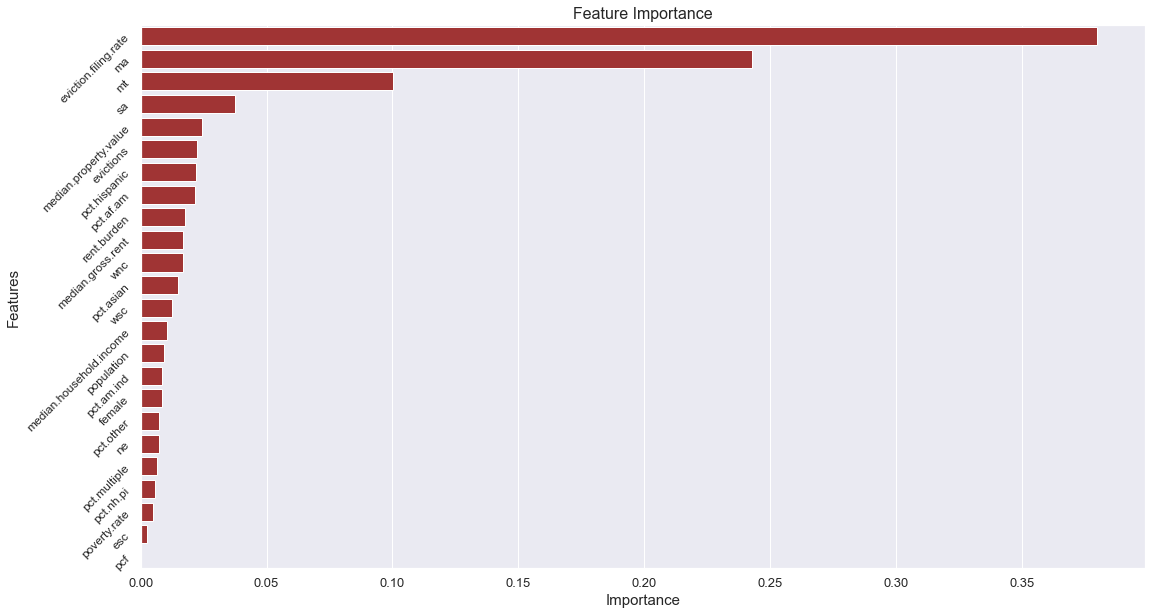

In [131]:
#plotting feature importance 
data={'feature_names': X_train.columns.values,'feature_importance':iso_forest.xgb_iso.feature_importances_}
importance_df = pd.DataFrame(data)
importance_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

fig, ax = plt.subplots(figsize=(18,10))

ax = sns.barplot(importance_df['feature_importance'], importance_df['feature_names'], 
                 data=importance_df, color='firebrick')

plt.title("Feature Importance", fontsize=16)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Importance', fontsize=15)
plt.yticks(fontsize=12, rotation=45)
plt.xticks(fontsize=13)

plt.savefig('images/feature_importances.png');

### Final Model

XGBoost
1. R2
    - Train: 0.9467
    - Test: 0.9435
2. RMSE
    - Train: 0.8258
    - Test: 0.8191


## Going Forward

1. Evaluate and train the model on data collected from 2017 to present 
2. Incorporate additional features
    - crime rates, gov. services utilized, etc. 
3. Conduct time series analysis

**Note**
- Given the timeframe of the available data from the Eviction Lab (up to 2016), data related to the COVID-19 pandemic is  irrelevant for analysis
- It is likely that analysis from 2020 and 2021 will be impacted by interventions such as eviction moratoriums 